In [1]:
# --- Notebook Theme (codes from @vivek468 & @sonalisingh1411) ---
from IPython.core.display import display, HTML, Javascript

color_map = ['#176BA0', '#19AADE']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

/tmp/ipykernel_10387/1101106015.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


# <h1 style="font-family: Trebuchet MS; padding: 12px; font-size: 48px; color: #19AADE; text-align: center; line-height: 1.25;"><b>🏬🔧 Data Pre-processing,<span style="color: #000000">  Feature Engineering 📉</span></b><br><span style="color: #19AADE; font-size: 24px">on Big Mart Sales Dataset </span></h1>
<hr>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>
<center>
    <img src="https://images.unsplash.com/photo-1588421024623-940056140e58?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1169&q=80" alt="Mart" width="80%">
</center>
<br>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">Data Set Problems 🤔</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 BigMart's data scientists gathered <b>2013 sales data for 1559 commodities across ten locations in many cities</b>. Additionally, certain characteristics of each product and retailer have been determined. <br>
    👉 <mark><b>Data pre-processing and feature engineering will be performed to prepare the dataset</b></mark> before it is used by the machine learning model.
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">Objectives of Notebook 📌</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>This notebook aims to:</b>
    <ul>
        <li> Perform <mark><b>initial data exploration</b></mark>.</li>
        <li> Perform <mark><b>data pre-processing</b></mark>.</li>
        <li> Perform <mark><b>EDA</b></mark> and <mark><b>hypothesis testing (statistical and non-statistical)</b></mark> in cleaned data set.</li>
        <li> Perform <mark><b>feature engineering (one-hot encoding, label encoding, and binning)</b></mark>.</li>
    </ul>
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">Data Set Description 🧾</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <b>12 variables</b> in this data set:
    <ul>
        <li> <mark><b>5 categorical</b></mark> variables,</li>
        <li> <mark><b>5 continuous</b></mark> variables,</li>
        <li> <mark><b>1</b></mark> variable to accommodate the <mark><b>Item identifier (ID)</b></mark>, and</li>
        <li> <mark><b>1</b></mark> variable to accommodate the <mark><b>Outlet identifier (ID)</b></mark>.</li>
    </ul><br>
    👉 The following is the <b>structure of the data set</b>.<br>

<table style="width:100%">
<thead>
  <tr>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Column Name</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Data Type</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Type</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Description</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="font-weight: bold">Item_Identifier</td>
    <td>char</td>
    <td>Nominal</td>
    <td>Product ID</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Item_Weight</td>
    <td>num</td>
    <td>Ratio</td>
    <td>Weight of product</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Item_Fat_Content</td>
    <td>char</td>
    <td>Nominal</td>
    <td>Content of product (low fat or regular)</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Item_Visibility</td>
    <td>num</td>
    <td>Nominal</td>
    <td>The percentage of all products in the store that are assigned to a specific product in the total display area</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Item_Type</td>
    <td>char</td>
    <td>Nominal</td>
    <td>Category of product</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Item_MRP</td>
    <td>num</td>
    <td>Ratio</td>
    <td>Maximum retail price of a product</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Outlet_Identifier</td>
    <td>char</td>
    <td>Nominal</td>
    <td>Store ID</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Outlet_Establishment_Year</td>
    <td>num</td>
    <td>Nominal</td>
    <td>Year the store established</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Outlet_Size</td>
    <td>char</td>
    <td>Ordinal</td>
    <td>Size of the store</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Outlet_Location_Type</td>
    <td>char</td>
    <td>Ordinal</td>
    <td>The type of city where the store is located</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Outlet_Type</td>
    <td>char</td>
    <td>Ordinal</td>
    <td>Type of the store</td>
  </tr>
  <tr style="background-color: #E0FBFF">
    <td style="font-weight: bold">Item_Outlet_Sales</td>
    <td>num</td>
    <td>Nominal</td>
    <td>Sales of product</td>
  </tr>
</tbody>
</table>

</div>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [2]:
# --- Importing Libraries ---
#%pip install missingno
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Color Palettes 🎨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will create some <b>color palettes</b> that will be used in this notebook.
</div>

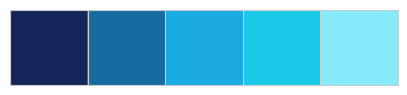

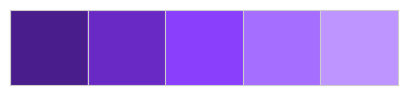

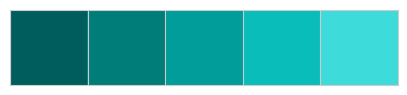

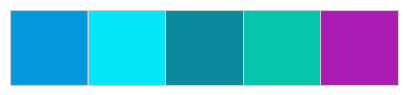

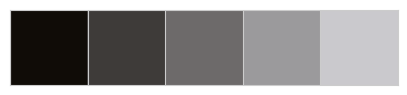

In [3]:
# --- Create List of Color Palletes ---
cyan_grad = ['#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA']
purple_grad = ['#491D8B', '#6929C4', '#8A3FFC', '#A56EFF', '#BE95FF']
teal_grad = ['#005D5D', '#007D79', '#009D9A', '#08BDBA', '#3DDBD9']
color_mix = ['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes ---
sns.palplot(cyan_grad)
sns.palplot(purple_grad)
sns.palplot(teal_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">4. | Reading Dataset 👓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After importing libraries, <b>the dataset that will be used will be imported</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

In [4]:
# --- Importing Dataset ---
ds = pd.read_csv("/home/anassiddiqui/Downloads/train_Av.csv")

# --- Reading Dataset ---
ds.head().style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.300000,Low Fat,0.016047,Dairy,249.809200,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000
DRC01,5.920000,Regular,0.019278,Soft Drinks,48.269200,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800
FDN15,17.500000,Low Fat,0.016760,Meat,141.618000,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000
FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.095000,OUT010,1998,nan,Tier 3,Grocery Store,732.380000
NCD19,8.930000,Low Fat,0.000000,Household,53.861400,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200


In [47]:
ds = pd.read_csv("/home/anassiddiqui/Downloads/train_Av.csv")

In [49]:
ds.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [50]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Dataset Info :.')
print('\033[0m\033[36m*' * 20)
print('\033[0m'+'Total Rows:'+'\033[36m\033[1m', ds.shape[0])
print('\033[0m'+'Total Columns:'+'\033[36m\033[1m', ds.shape[1])
print('\033[0m\033[36m*' * 20)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.')
print('\033[0m\033[36m*' * 22 +'\033[0m')
ds.info(memory_usage = False)

.: Dataset Info :.
********************
Total Rows: 8523
Total Columns: 12
********************


.: Dataset Details :.
**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>12 columns</b></mark> and <mark><b>8523 observations</b></mark> with various data types.<br>
    👉 However, there are <mark><b>null values</b></mark> detected in <b>"Item_Weight"</b> and <b>"Outlet_Size"</b> columns.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">5. | Initial Data Exploration 🔍</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before pre-process the data.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1 | Categorical Variable 🔠</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The first type of variable that will be explored is <b>categorical variable</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.1 | Item_Identifier</div>

In [7]:
# --- Print "Item_Identifier" Values ---
print('\033[36m*' * 29)
print('\033[1m'+'.: Item Identifier Values :.'+'\033[0m')
print('\033[36m*' * 29+'\033[0m')
ds.Item_Identifier.value_counts(dropna=False)

*****************************
.: Item Identifier Values :.
*****************************


FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>1559 item IDs</b></mark> detected.<br>
    👉 The ID <mark><b>start with the same specific character</b></mark> (Ex: "DR", "FD", or "NC") <mark><b>followed by numbers</b></mark> at the end of ID. 
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.2 | Item_Fat_Content</div>

*****************************
.: Item Fat Content Total :.
*****************************


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

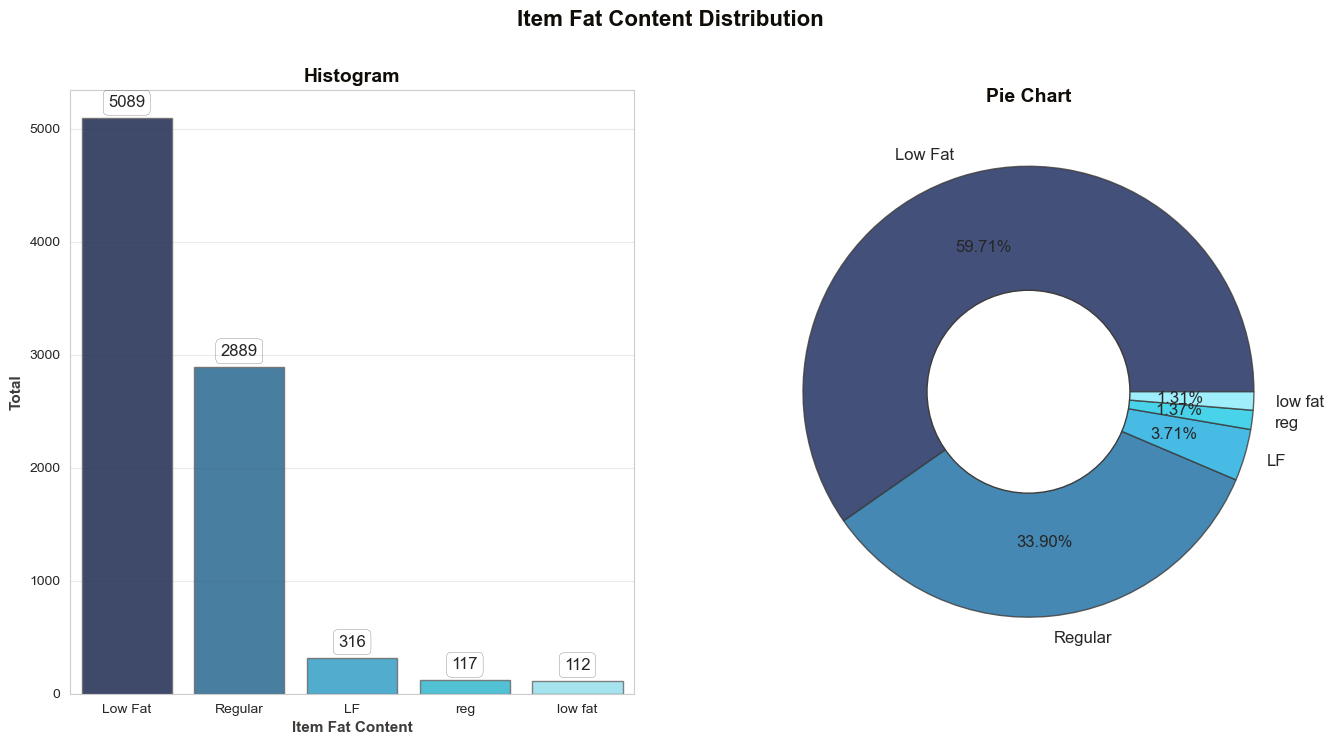

In [8]:
# --- Setting Colors, Labels, Order ---
colors=cyan_grad
labels=ds['Item_Fat_Content'].dropna().unique()
order=ds['Item_Fat_Content'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Item Fat Content Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Item_Fat_Content', data=ds, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+100,rect.get_height(), horizontalalignment='center',
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))

plt.xlabel('Item Fat Content', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(ds['Item_Fat_Content'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%',
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 29)
print('\033[1m'+'.: Item Fat Content Total :.'+'\033[0m')
print('\033[36m*' * 29+'\033[0m')
ds.Item_Fat_Content.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that <mark><b>most of the products are categorized as "Low Fat" products</b></mark> with a percentage of <b>59.71%</b>.<br>
    👉 There are <mark><b>inconsistent values</b></mark>, means that <b>some values have same meaning but in different form</b>. (Ex: "LF" and "low fat" for Low Fat", and "reg" for Regular).
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.3 | Item_Type</div>

In [9]:
# --- Setting Colors, Labels, Order ---
colors=teal_grad
labels=ds['Item_Type'].dropna().unique()
order=ds['Item_Type'].value_counts().index

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 21)
print('\033[1m'+'.: Item Type List :.'+'\033[0m')
print('\033[36m*' * 21+'\033[0m')
ds.Item_Type.value_counts(dropna=False)

*********************
.: Item Type List :.
*********************


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

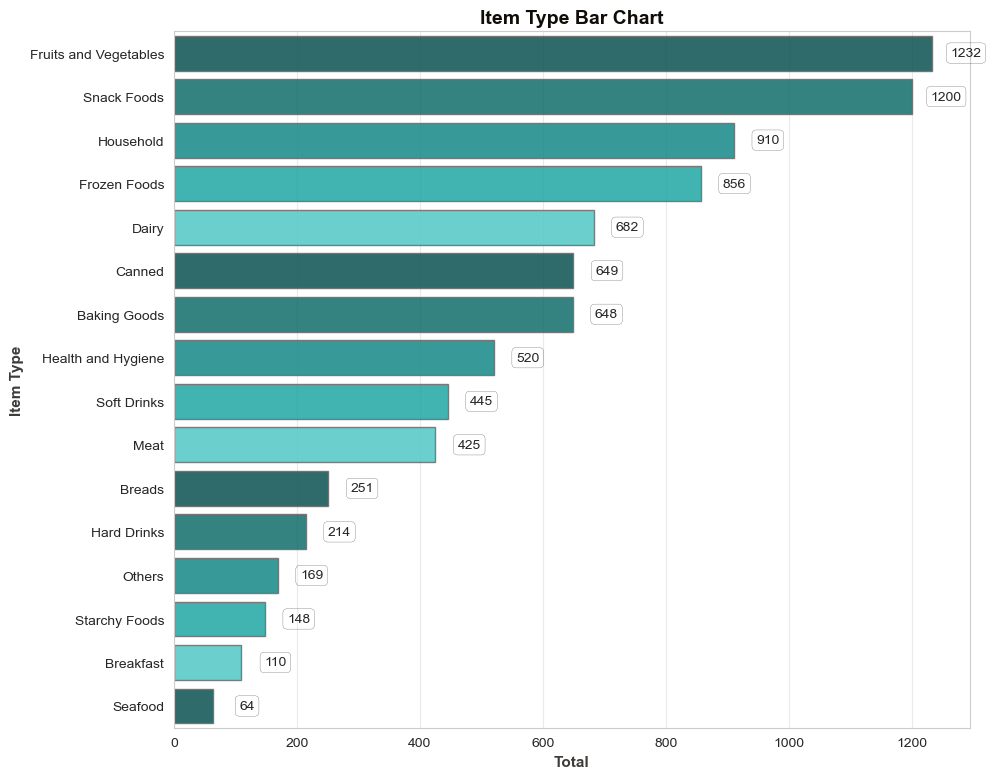

In [10]:
# --- Histogram ---
plt.figure(figsize=(10, 8))
ax = sns.countplot(y='Item_Type', data=ds, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width+55, y+height/2, '{:.0f}'.format(width), horizontalalignment='center', verticalalignment='center',
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.title('Item Type Bar Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0.4);

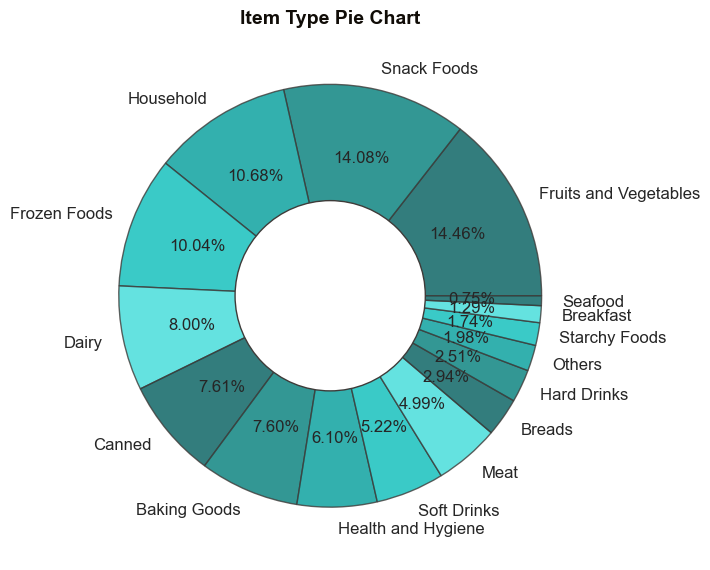

In [11]:
# --- Pie Chart ---
plt.figure(figsize=(9, 7))
plt.title('Item Type Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(ds['Item_Type'].value_counts(), labels=order, colors=colors, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>16 item types</b></mark> available, with <mark><b>"Fruits and vegetables" became item type with the highest number</b></mark>, with a percentage of 14.46%.<br>
    👉 However, the <mark><b>lowest number item type is "Seafood"</b></mark>, which only has a percentage of 0.75%.
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.4 | Outlet_Identifier</div>

******************************
.: Outlet Identifier Total :.
******************************


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

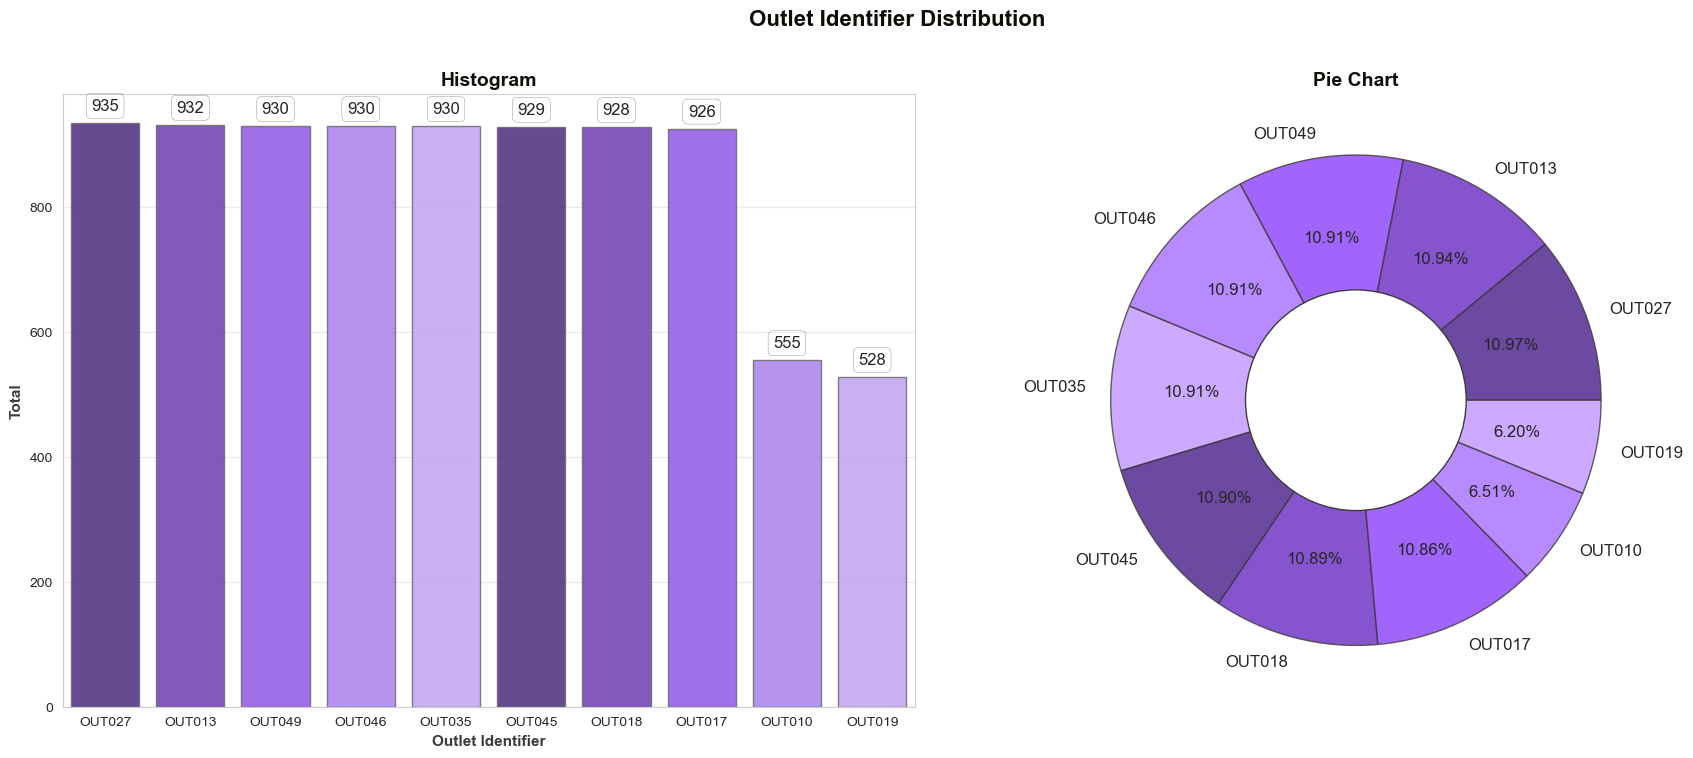

In [12]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=ds['Outlet_Identifier'].dropna().unique()
order=ds['Outlet_Identifier'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Identifier Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Identifier', data=ds, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.965])
plt.xlabel('Outlet Identifier', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(ds['Outlet_Identifier'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 30)
print('\033[1m'+'.: Outlet Identifier Total :.'+'\033[0m')
print('\033[36m*' * 30+'\033[0m')
ds.Outlet_Identifier.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>ten outlets</b></mark>, with <mark><b>almost all the outlets have the same number of outlets</b></mark> (around 11%).<br>
    👉 However, <mark><b>"OUT10" and "OUT19" have the least number of outlets</b></mark> (around 6%).
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.5 | Outlet_Size</div>

*************************
.: Outlet Size Total :.
*************************


Medium    2793
NaN       2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

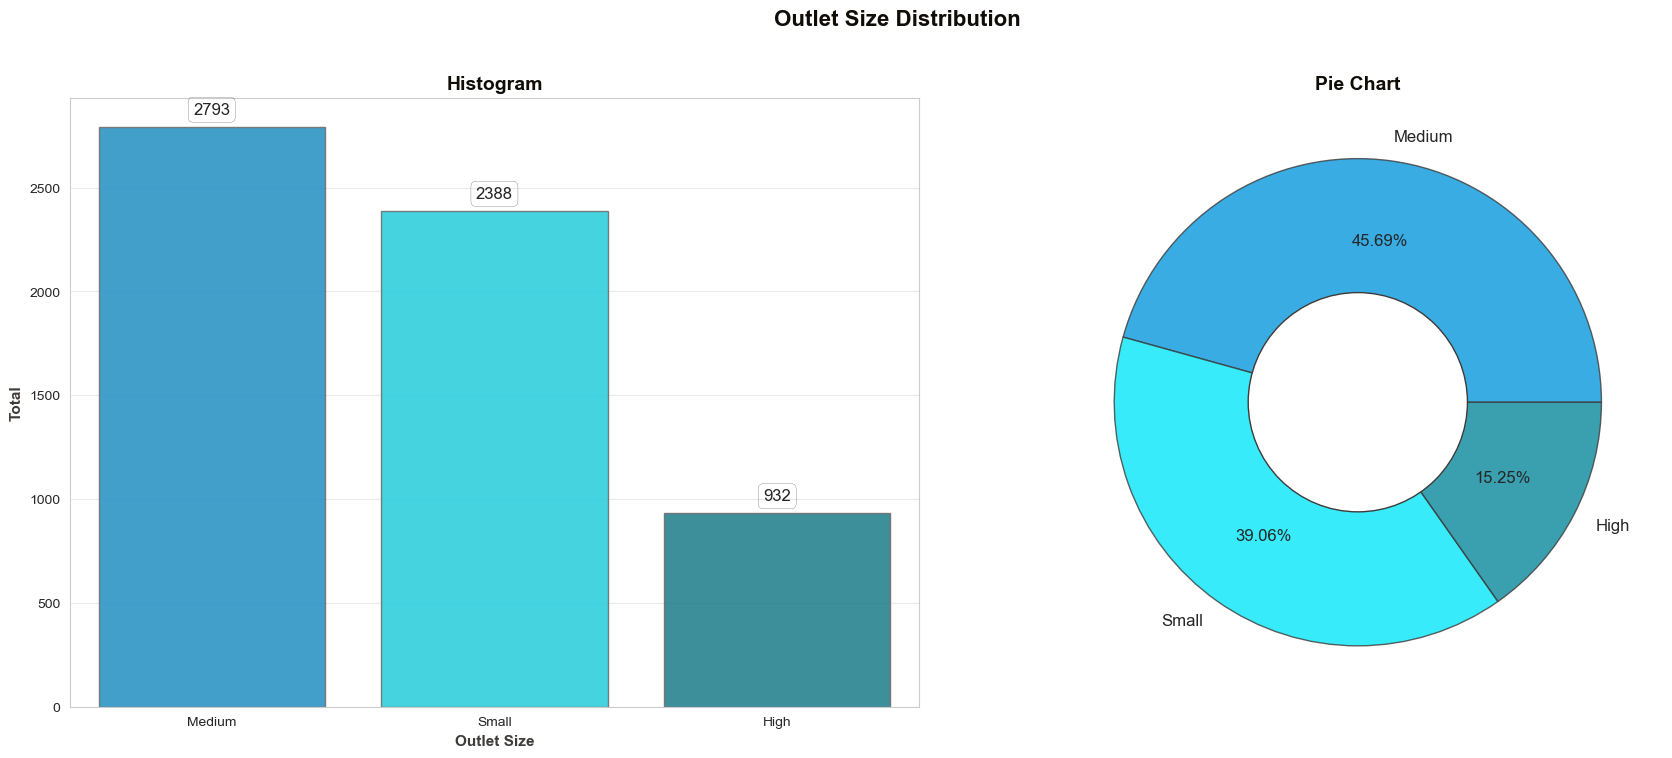

In [13]:
# --- Setting Colors, Labels, Order ---
colors=color_mix
labels=ds['Outlet_Size'].dropna().unique()
order=ds['Outlet_Size'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Size Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Size', data=ds, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Size', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(ds['Outlet_Size'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 25)
print('\033[1m'+'.: Outlet Size Total :.'+'\033[0m')
print('\033[36m*' * 25+'\033[0m')
ds.Outlet_Size.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>3 types</b></mark> of outlet size, <b>small, medium, and high</b> size.<br>
    👉 <mark><b>Medium</mark></b> size becomes the <b>outlet size with the most number</b> (45.69%).<br>
    👉 However, the <b>smallest number outlet size</b> is <mark><b>High</b></mark> size (only 15.25%).
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.6 | Outlet_Location_Type</div>

****************************
.: Outlet Location Total :.
****************************


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

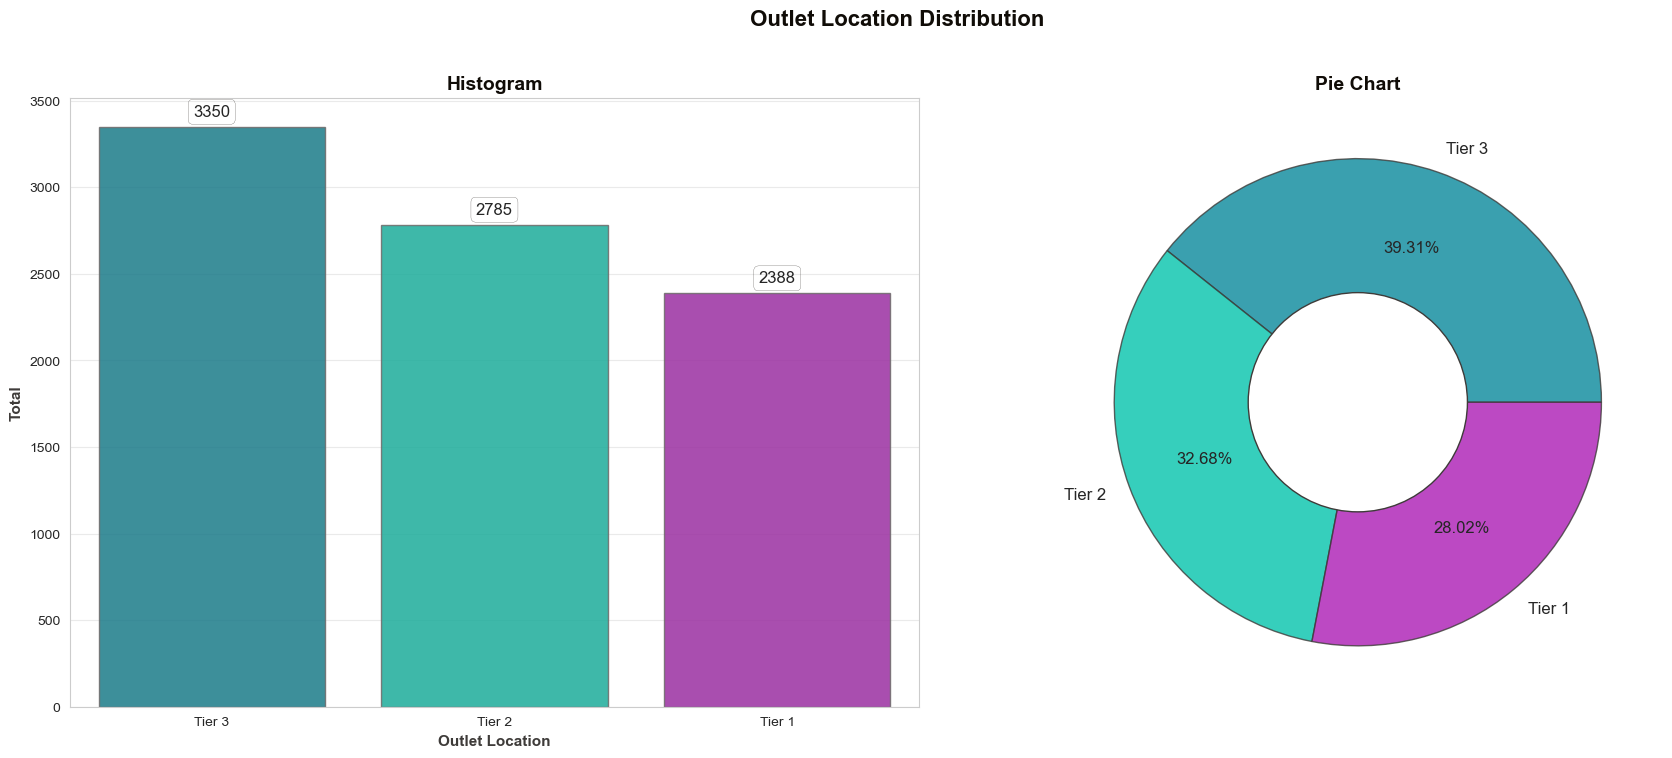

In [14]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:5]
labels=ds['Outlet_Location_Type'].dropna().unique()
order=ds['Outlet_Location_Type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Location Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Location_Type', data=ds, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Location', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(ds['Outlet_Location_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 28)
print('\033[1m'+'.: Outlet Location Total :.'+'\033[0m')
print('\033[36m*' * 28+'\033[0m')
ds.Outlet_Location_Type.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>3 levels</b></mark> of outlet location, <b>tier 1, tier 2, and tier 3</b>.<br>
    👉 <mark><b>Tier 3</mark></b> becomes the <b>outlet location with the most number</b> (39.31%).<br>
    👉 However, the <b>smallest number outlet location</b> is <mark><b>Tier 1</b></mark> (only 28.02%).
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.1.7 | Outlet_Type</div>

************************
.: Outlet Type Total :.
************************


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

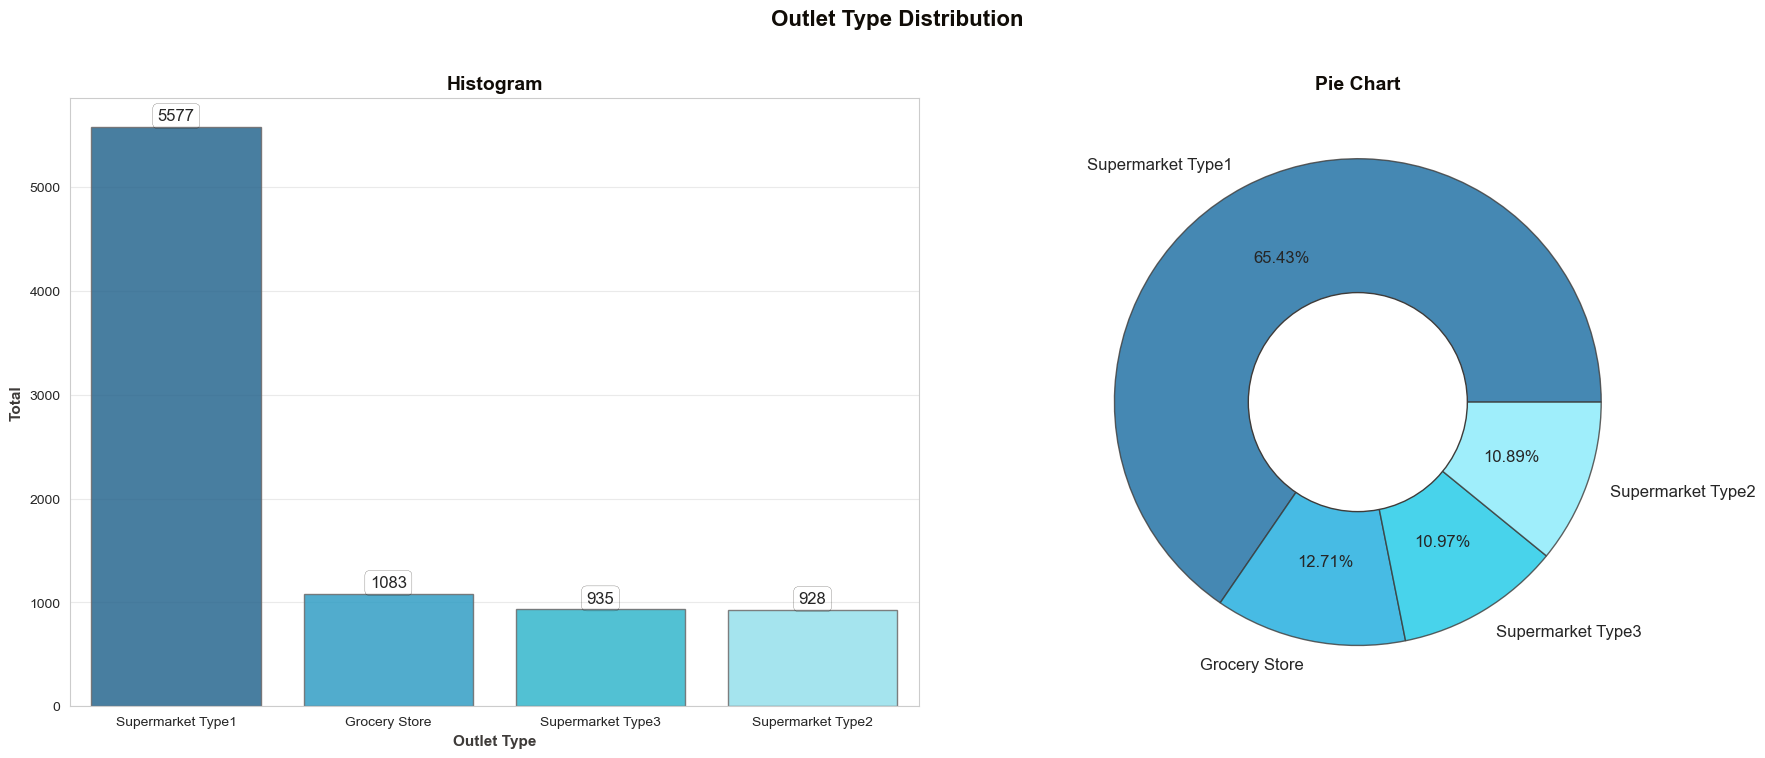

In [15]:
# --- Setting Colors, Labels, Order ---
colors=cyan_grad[1:5]
labels=ds['Outlet_Type'].dropna().unique()
order=ds['Outlet_Type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 8))
plt.suptitle('Outlet Type Distribution', fontweight='heavy', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histogram ---
countplt = plt.subplot(1, 2, 1)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='Outlet_Type', data=ds, palette=colors, order=order, edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+60,rect.get_height(), horizontalalignment='center', 
             fontsize=12, bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.15, boxstyle='round'))
plt.tight_layout(rect=[0, 0.04, 1, 0.96])
plt.xlabel('Outlet Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Pie Chart ---
plt.subplot(1, 2, 2)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
plt.pie(ds['Outlet_Type'].value_counts(), colors=colors, labels=order, pctdistance=0.67, autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre);

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[36m*' * 24)
print('\033[1m'+'.: Outlet Type Total :.'+'\033[0m')
print('\033[36m*' * 24+'\033[0m')
ds.Outlet_Type.value_counts(dropna=False)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>4 outlet types</b></mark> namely <b>grocery store, supermarket type 1, supermarket type 2, and supermarket type 3</b>.<br>
    👉 <mark><b>Supermarket type 1</b></mark> becomes the <b>outlet type with the most number</b> (65.43%).<br>
    👉 However, the <b>smallest number outlet type</b> is <mark><b>supermarket type 2</b></mark> (only 10.89%).
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2 | Continuous Variable 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second type of variable that will be explored is <b>continuous variable</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2.1 | Descriptive Statistics 📏</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>descriptive statistics</b> of numerical variables.
</div>

In [16]:
# --- Descriptive Statistics ---
ds.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.000000,12.857645,4.643456,4.555000,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.000000,0.066132,0.051598,0.000000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.000000,140.992782,62.275067,31.290000,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.000000,1997.831867,8.371760,1985.000000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.000000,2181.288914,1706.499616,33.290000,834.247400,1794.331000,3101.296400,13086.964800


### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.2.2 | Continuous Column Distribution 📈</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show the continuous column distribution using <b>histograms and box plots</b>.
</div>

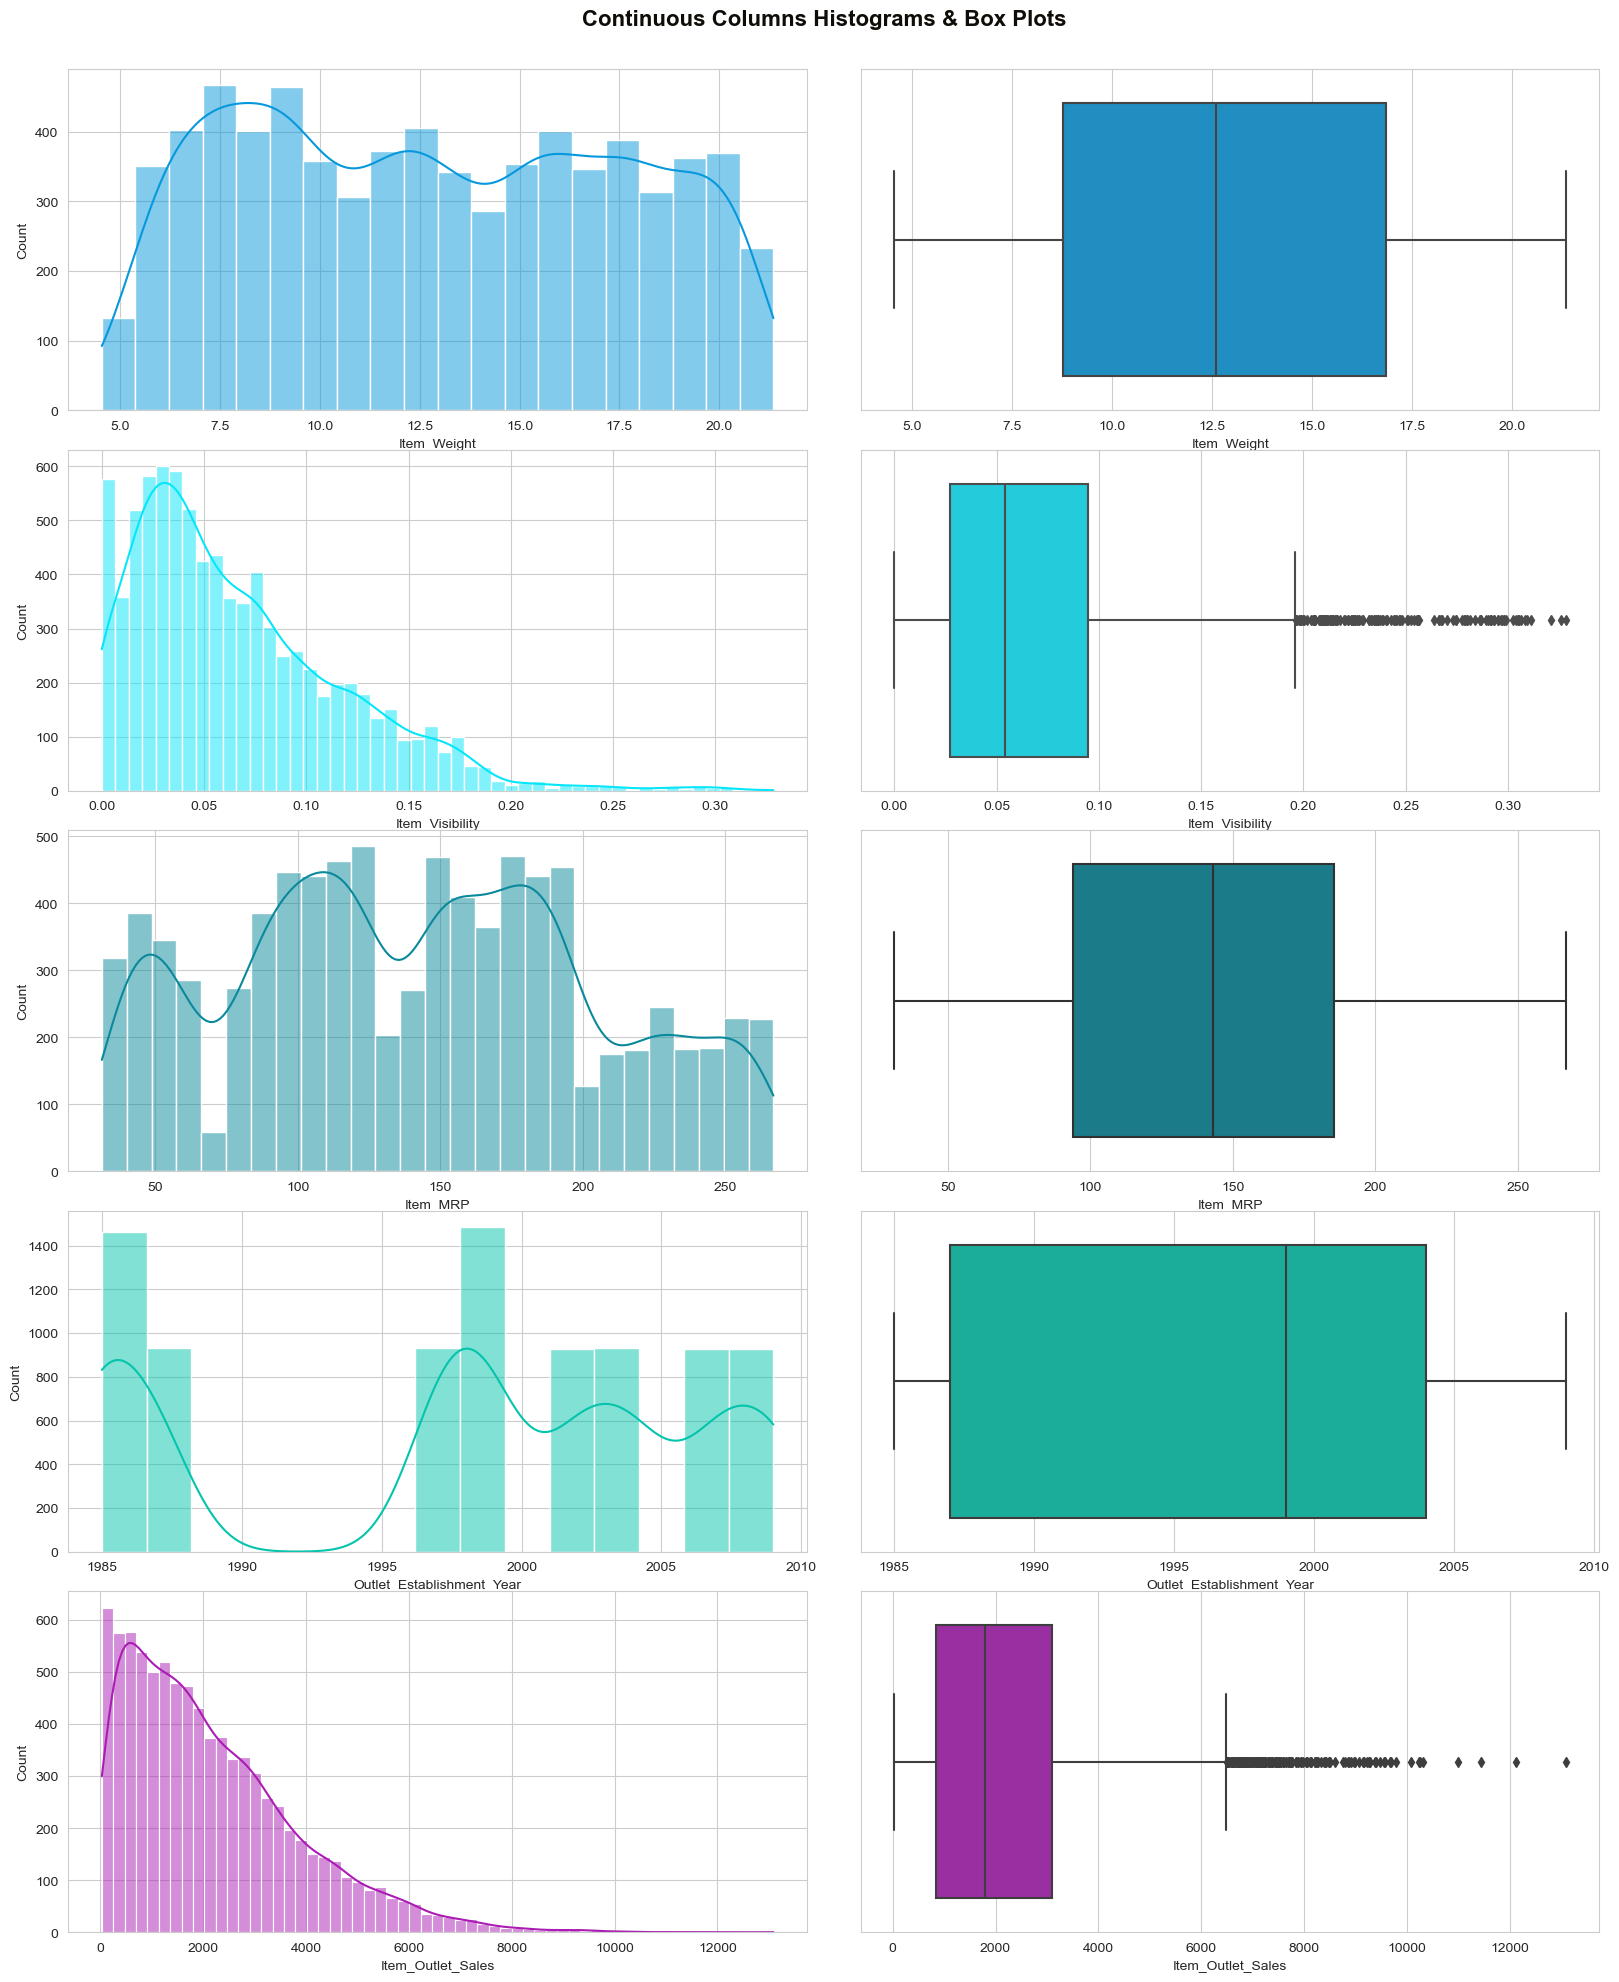

In [17]:
# --- Plot Size ---
fig, axs = plt.subplots(5, 2, figsize=(16, 20))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Continuous Columns Histograms & Box Plots', fontweight='bold', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])

# --- Histogram of Continuous Variables (Row 1) ---
sns.histplot(data=ds, x='Item_Weight', kde=True, ax=axs[0, 0], color=color_mix[0])
sns.boxplot(data=ds, x='Item_Weight', ax=axs[0, 1], color=color_mix[0]);

# --- Histogram of Continuous Variables (Row 2) ---
sns.histplot(data=ds, x='Item_Visibility', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.boxplot(data=ds, x='Item_Visibility', ax=axs[1, 1], color=color_mix[1])

# --- Histogram of Continuous Variables (Row 3) ---
sns.histplot(data=ds, x='Item_MRP', kde=True, ax=axs[2, 0], color=color_mix[2])
sns.boxplot(data=ds, x='Item_MRP', ax=axs[2, 1], color=color_mix[2])

# --- Histogram of Continuous Variables (Row 4) ---
sns.histplot(data=ds, x='Outlet_Establishment_Year', kde=True, ax=axs[3, 0], color=color_mix[3])
sns.boxplot(data=ds, x='Outlet_Establishment_Year', ax=axs[3, 1], color=color_mix[3])

# --- Histogram of Continuous Variables (Row 5) ---
sns.histplot(data=ds, x='Item_Outlet_Sales', kde=True, ax=axs[4, 0], color=color_mix[4])
sns.boxplot(data=ds, x='Item_Outlet_Sales', ax=axs[4, 1], color=color_mix[4]);

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Item_Weight, Item_MRP, and Outlet_Establishment_Year distribution</b> is <mark><b>normal</b></mark> (no outliers detected in these columns). <br>
    👉 For <b>Item_Visibility and Item_Outlet_Sales distribution</b>, the distribution is <mark><b>right-skewed distributions</b></mark> (has a long right tail, the mean position is on the right side of the data). These outliers will be pre-processed in the next section.
</div>

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.3 | Missing Values Exploration ❓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>missing values exploration for all columns</b>.
</div>

*******************************************
.: Total Missing Values in each Columns :.
*******************************************


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

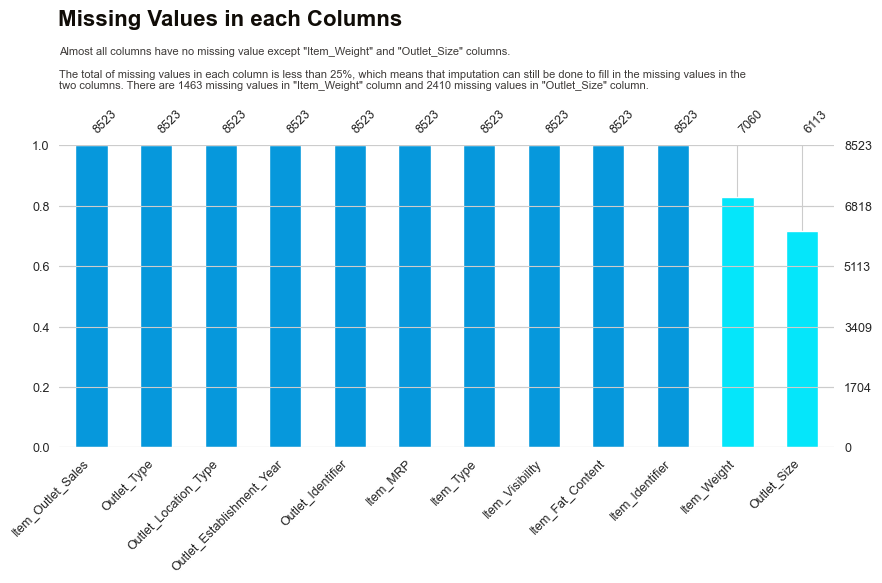

In [18]:
# --- Plot Missing Values ---
mso.bar(ds, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[0],
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0], color_mix[1], color_mix[1]], 
        figsize=(10, 4), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns', fontweight='heavy', x=0.124, y=1.22, ha='left',fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Almost all columns have no missing value except "Item_Weight" and "Outlet_Size" columns.\n\nThe total of missing values in each column is less than 25%, which means that imputation can still be done to fill in the missing values in the\ntwo columns. There are 1463 missing values in "Item_Weight" column and 2410 missing values in "Outlet_Size" column.\n', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.grid(axis='both', alpha=0);

# --- Total Missing Values in each Columns ---
print('\033[36m*' * 43)
print('\033[1m'+'.: Total Missing Values in each Columns :.'+'\033[0m')
print('\033[36m*' * 43+'\033[0m')
ds.isnull().sum()

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">6. | Data Pre-processing ⚙</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>Data pre-processing</b></mark> will be performed in this section <b>to ensure high-quality data</b> by cleaning dirty data, imputing missing values, and handling outliers.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.1 | Handling Dirty Data 🧹</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In previous section, there are <b>some incosistent values detected in "Item_Fat_Content" column</b>.<br>
    👉 In this section, <mark><b>those inconsistent values will be transformed into one value</b></mark>, which has the same meaning/interpretation.
</div>

In [19]:
# --- Transform 'Low Fat' Incosistent Values ---
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

# --- Transform 'Regular' Incosistent Values ---
ds['Item_Fat_Content'] = ds['Item_Fat_Content'].replace('reg', 'Regular')

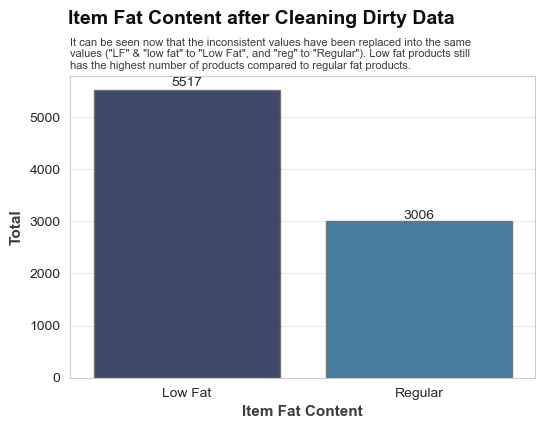

In [20]:
# --- Creating Bar Chart ---
fig, ax = plt.subplots()
ax = sns.countplot(x='Item_Fat_Content', data=ds, palette=cyan_grad, edgecolor=black_grad[2], alpha=0.85)

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()*1.015,rect.get_height(), horizontalalignment='center', 
             fontsize=10)
fig.set_size_inches(6, 4)
plt.suptitle('Item Fat Content after Cleaning Dirty Data', fontweight='heavy', x=0.122, y=1.045, ha='left', fontsize='14',
             fontfamily='sans-serif', color=black_grad[0])
plt.title('It can be seen now that the inconsistent values have been replaced into the same\nvalues ("LF" & "low fat" to "Low Fat", and "reg" to "Regular"). Low fat products still\nhas the highest number of products compared to regular fat products.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.xlabel('Item Fat Content', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='x', alpha=0)
plt.grid(axis='y', alpha=0.4);

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2 | Handling Missing Values ❓</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <b>handle missing values</b> in "Outlet_Size" and "Item_Weight" columns.
</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2.1 | Outlet_Size</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 An <b>analysis</b> will be carried out before carrying out the imputation process.<br><br>
    👉 In previous section, medium size outlet have the highest number. However, <mark><b>imputation with "medium" will make the dataset 'bias'</b></mark> since medium size outlet <b>will dominate other outlet size</b>.<br>
    👉 The first step is to <mark><b>group outlet types and outlet sizes, then calculate the total available outlets</b></mark> in the dataset.
</div>

In [21]:
# --- Before: Group 'Outlet_Type' and 'Outlet_Size' & Calculate Total Outlets ---
ds.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,528
4,Supermarket Type1,Small,1311
3,Supermarket Type1,Medium,930
6,Supermarket Type2,Medium,928
7,Supermarket Type3,Medium,935
2,Supermarket Type1,High,932
1,Grocery Store,nan,555
5,Supermarket Type1,nan,1305


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that <mark><b>small outlet size belongs to grocery store and supermarket type 1</b></mark>.<br>
    👉 Beside doing imputation with mode method, <mark><b>last value replacment value method will be used</b></mark> in order to <b>avoid bias</b> when doing further analysis.
</div>

In [22]:
# --- Imputation w/ Last Value Replacement Method ---
ds['Outlet_Size'] = ds['Outlet_Size'].replace(np.nan, 'Small')

In [23]:
# --- After: Group 'Outlet_Type' and 'Outlet_Size' & Calculate Total Outlets ---
ds.groupby(['Outlet_Type', 'Outlet_Size'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Outlet_Size'], ascending=False).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Segoe UI'})

,Outlet_Type,Outlet_Size,Item_Identifier
0,Grocery Store,Small,901
3,Supermarket Type1,Small,1512
2,Supermarket Type1,Medium,930
4,Supermarket Type2,Medium,928
5,Supermarket Type3,Medium,935
1,Supermarket Type1,High,932


### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2.2 | Item_Weight</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Before doing imputation process, an <b>analysis</b> will be carried out.<br><br>
    👉 As mentioned previously, <b>imputation using mean/mode is an effective technique to handle missing values</b>. However, this imputation method <mark><b>can make the data 'bias'</b></mark>.<br>
    👉 In order to make proper/high quality dataset, the first step is to do a <mark><b>quick analysis by grouping item id and its weight</b></mark> in a table.
</div>

In [24]:
# --- Before: Group 'Item_Identifier' and 'Item_Weight' ---
ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='PuBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
2879,DRA24,nan
1148,DRA24,19.350000
6057,DRA59,nan
1876,DRA59,8.270000
3733,DRB01,nan
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 From the table, <b>there are some previous "Item_Weight" values in the dataset based on the "Item_Identifier" column</b>.<br>
    👉 In order to make high quality dataset, <mark><b>these missing values will be imputed using last value replacement method</b></mark>.
</div>

In [25]:
# --- Last Value Replacment using `bfill` and `ffill` ---
ds['Item_Weight']=ds.groupby('Item_Identifier')['Item_Weight'].fillna(method='ffill')
ds['Item_Weight']=ds.groupby('Item_Identifier')['Item_Weight'].fillna(method='bfill')

In [26]:
# --- After: Group 'Item_Identifier' and 'Item_Weight' ---
ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier']).head(13).style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'})

,Item_Identifier,Item_Weight
118,DRA12,11.600000
1148,DRA24,19.350000
1876,DRA59,8.270000
3465,DRB01,7.390000
1431,DRB13,6.115000
2657,DRB24,8.785000
776,DRB25,12.300000
103,DRB48,16.750000
1,DRC01,5.920000
772,DRC12,17.850000


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 As can be seen, <mark><b>the missing values has been imputed using last value replacement method</b></mark>.<br>
    👉 The next step is <b>do another check if there is still missing values available in the dataaset</b>.
</div>

In [27]:
# --- Print Dataset Info ---
print('\033[36m\033[1m'+'.: Check Missing Values Left :.')
print('\033[0m\033[36m*' * 32+'\033[0m')

# --- Check Missing Values Left in Dataset ---
ds1 = ds[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])
nan_values = ds1[ds1['Item_Weight'].isna()]
print (nan_values)

.: Check Missing Values Left :.
********************************
     Item_Identifier  Item_Weight
4187           FDE52          NaN
1922           FDK57          NaN
927            FDN52          NaN
5022           FDQ60          NaN


<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After doing another check, <mark><b>there are still missing values in "Item_Weight" column</b></mark>. This is due <b>those item IDs doesn't have previous item weight record/values</b>.<br>
    👉 Since those item IDs doesn't have previous item weight value, <mark><b>these missing values will be imputed with column mean value</b></mark>.
</div>

In [28]:
# --- 2nd Imputation using Mean Method ---
ds['Item_Weight']=ds['Item_Weight'].fillna(ds['Item_Weight'].mean())

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.2.3 | After Imputation 🔨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 After imputation for "Outlet_Size" and "Item_Weight" columns, <b>a final check will be done to check if there is still missing values left in the dataset</b>.
</div>

************************************************************
.: Total Missing Values in each Columns After Imputation :.
************************************************************


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

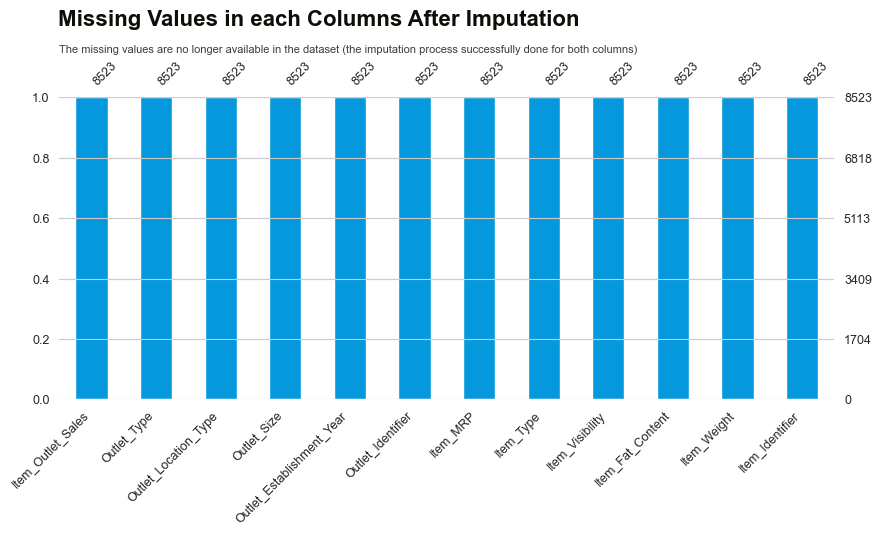

In [29]:
# --- Plot Missing Values After Imputation ---
mso.bar(ds, fontsize=9, color=[color_mix[0], color_mix[0], color_mix[0], color_mix[0], 
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0], 
                               color_mix[0], color_mix[0], color_mix[0], color_mix[0]], 
              figsize=(10, 4), sort='descending', labels=True)

# --- Title & Subtitle Settings ---
plt.suptitle('Missing Values in each Columns After Imputation', fontweight='heavy', x=0.124, y=1.1, ha='left',
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])
plt.title('The missing values are no longer available in the dataset (the imputation process successfully done for both columns)', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1], pad=5)
plt.grid(axis='both', alpha=0);

# --- Total Missing Values in each Columns After Imputation ---
print('\033[36m*' * 60)
print('\033[1m'+'.: Total Missing Values in each Columns After Imputation :.'+'\033[0m')
print('\033[36m*' * 60+'\033[0m')
ds.isnull().sum()

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">6.3 | Handling Outliers 🔧</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 As mentioned in previous section, <b>"Item_Visibility" and "Item_Outlet_Sales" have outliers</b>.<br>
    👉 In this section, <mark><b>those columns will be transformed using log or square root transformation</b></mark>. After that, those technique <b>will be compared first before applied into real dataset</b>.
</div>

In [30]:
# --- Creating Copy of Both Columns ---
ds1 = ds[['Item_Visibility', 'Item_Outlet_Sales']].copy()

# --- Using Log Transformation ---
ds1['Item_Visibility_log'] = np.log(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_log'] = np.log(ds1['Item_Outlet_Sales'])

# --- Using Square Root Transformation
ds1['Item_Visibility_sqrt'] = np.sqrt(ds1['Item_Visibility'])
ds1['Item_Outlet_Sales_sqrt'] = np.sqrt(ds1['Item_Outlet_Sales'])

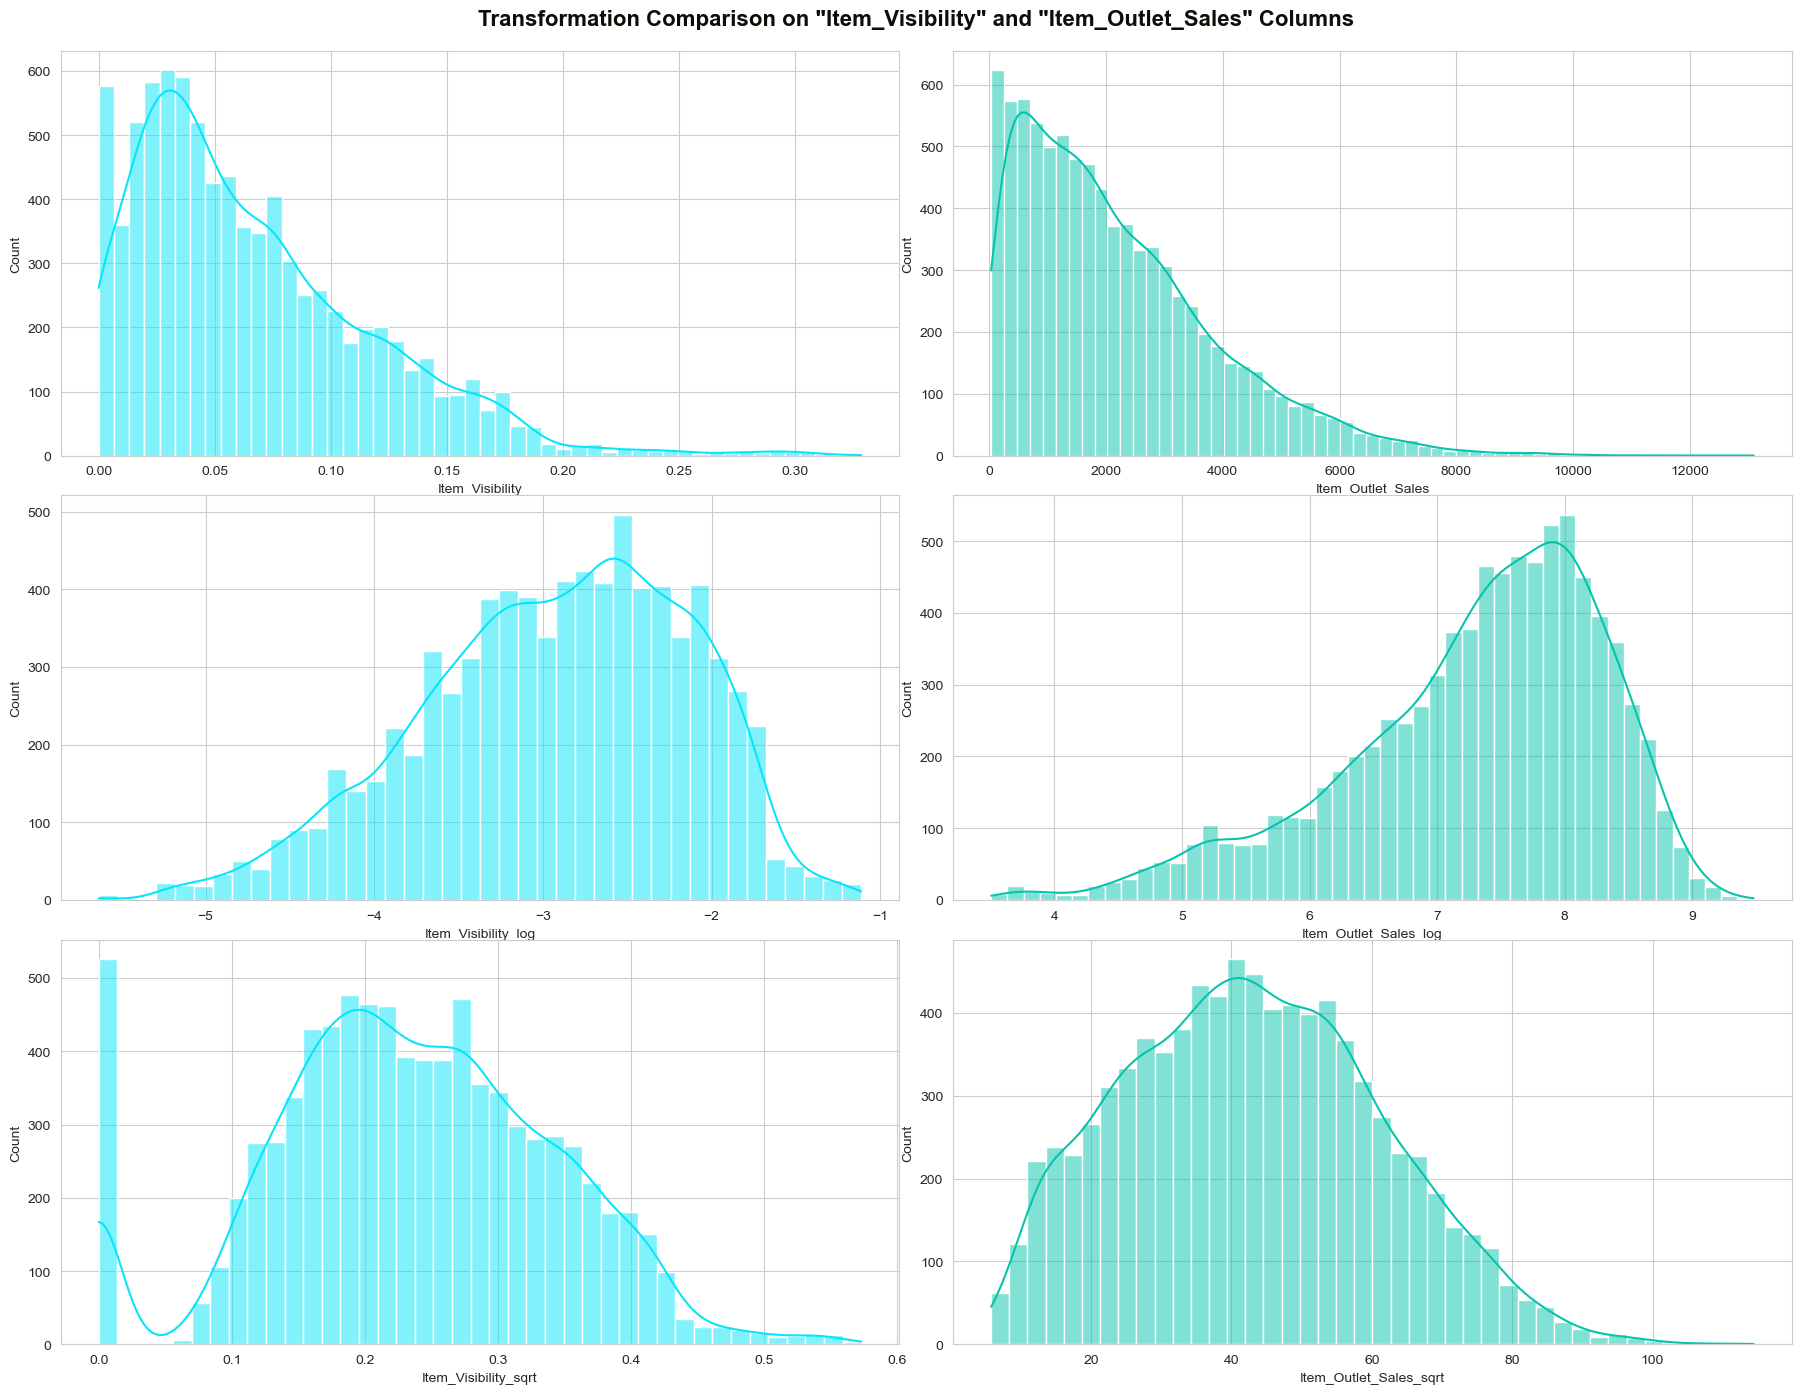

In [31]:
# --- Plot Size ---
fig, axs = plt.subplots(3, 2, figsize=(18, 14))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Transformation Comparison on "Item_Visibility" and "Item_Outlet_Sales" Columns', 
             fontweight='bold', fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Histograms of "Item_Visibility" Transformation (Column 1) ---
sns.histplot(data=ds1, x='Item_Visibility', kde=True, ax=axs[0, 0], color=color_mix[1])
sns.histplot(data=ds1, x='Item_Visibility_log', kde=True, ax=axs[1, 0], color=color_mix[1])
sns.histplot(data=ds1, x='Item_Visibility_sqrt', kde=True, ax=axs[2, 0], color=color_mix[1])

# --- Histograms of "Item_Outlet_Sales" Transformation (Column 2) ---
sns.histplot(data=ds1, x='Item_Outlet_Sales', kde=True, ax=axs[0, 1], color=color_mix[3])
sns.histplot(data=ds1, x='Item_Outlet_Sales_log', kde=True, ax=axs[1, 1], color=color_mix[3])
sns.histplot(data=ds1, x='Item_Outlet_Sales_sqrt', kde=True, ax=axs[2, 1], color=color_mix[3]);

In [32]:
# --- Skewness of Continuous Variables ---
print('\033[36m\033[1m'+'.: Transformation Skewness Values :.'+'\033[0m')
print('\033[36m*' * 37+'\033[0m')
ds1.skew(axis = 0, skipna = True)

.: Transformation Skewness Values :.
*************************************


Item_Visibility           1.167091
Item_Outlet_Sales         1.177531
Item_Visibility_log            NaN
Item_Outlet_Sales_log    -0.887753
Item_Visibility_sqrt     -0.098056
Item_Outlet_Sales_sqrt    0.234676
dtype: float64

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Based on histograms, skewness, and kurtosis values, <mark><b>it can be concluded that square root transformation is better</b></mark> compared to log transformation.<br>
    👉 It is because <b>the histogram distributions of square root transformation are closer to nomral distribution</b> even though there are still outliers detected in both columns.<br>
    👉 In addition, from the skewness value showed that <b>square root transformation able to reduce skewness value effectively</b>.<br>
    👉 The next step will <mark><b>apply square root transformation for both columns in real dataset</b></mark>.
</div>

In [33]:
# --- Apply Square Root Transformation on Real Dataset ---
ds['Item_Visibility_sqrt'] = np.sqrt(ds['Item_Visibility'])
ds['Item_Outlet_Sales_sqrt'] = np.sqrt(ds['Item_Outlet_Sales'])

# --- Drop Original Columns ---
ds = ds.drop(columns=['Item_Visibility', 'Item_Outlet_Sales'])

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">7. | EDA 📊</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will <mark><b>explore variables relationship</b></mark> in the dataset using different various plots/charts.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.1 | Heatmap 🔥</div>

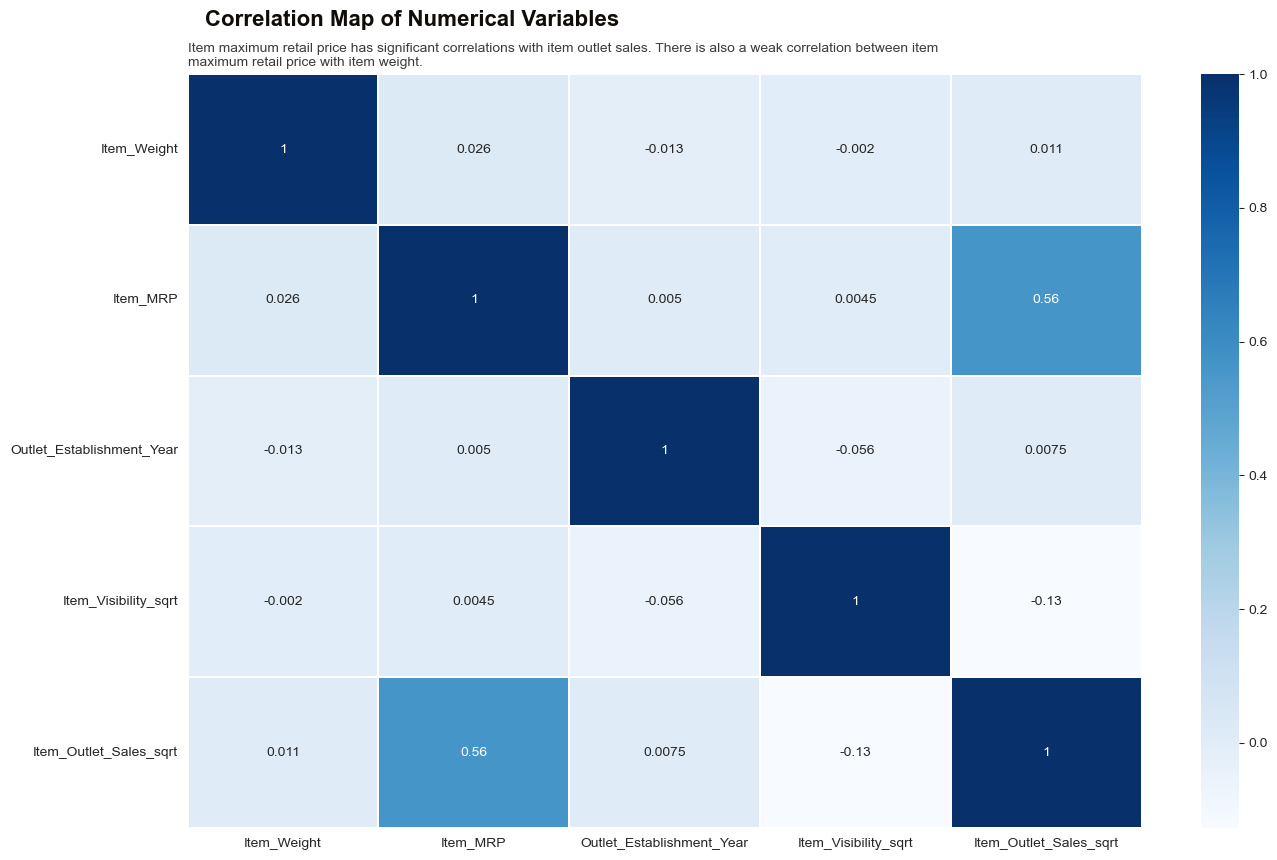

In [34]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(ds.corr(), annot=True, cmap='Blues', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', x=0.15, y=0.99, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Item maximum retail price has significant correlations with item outlet sales. There is also a weak correlation between item\nmaximum retail price with item weight.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.2 | Item Fat Content based on Item Type 🥧</div>

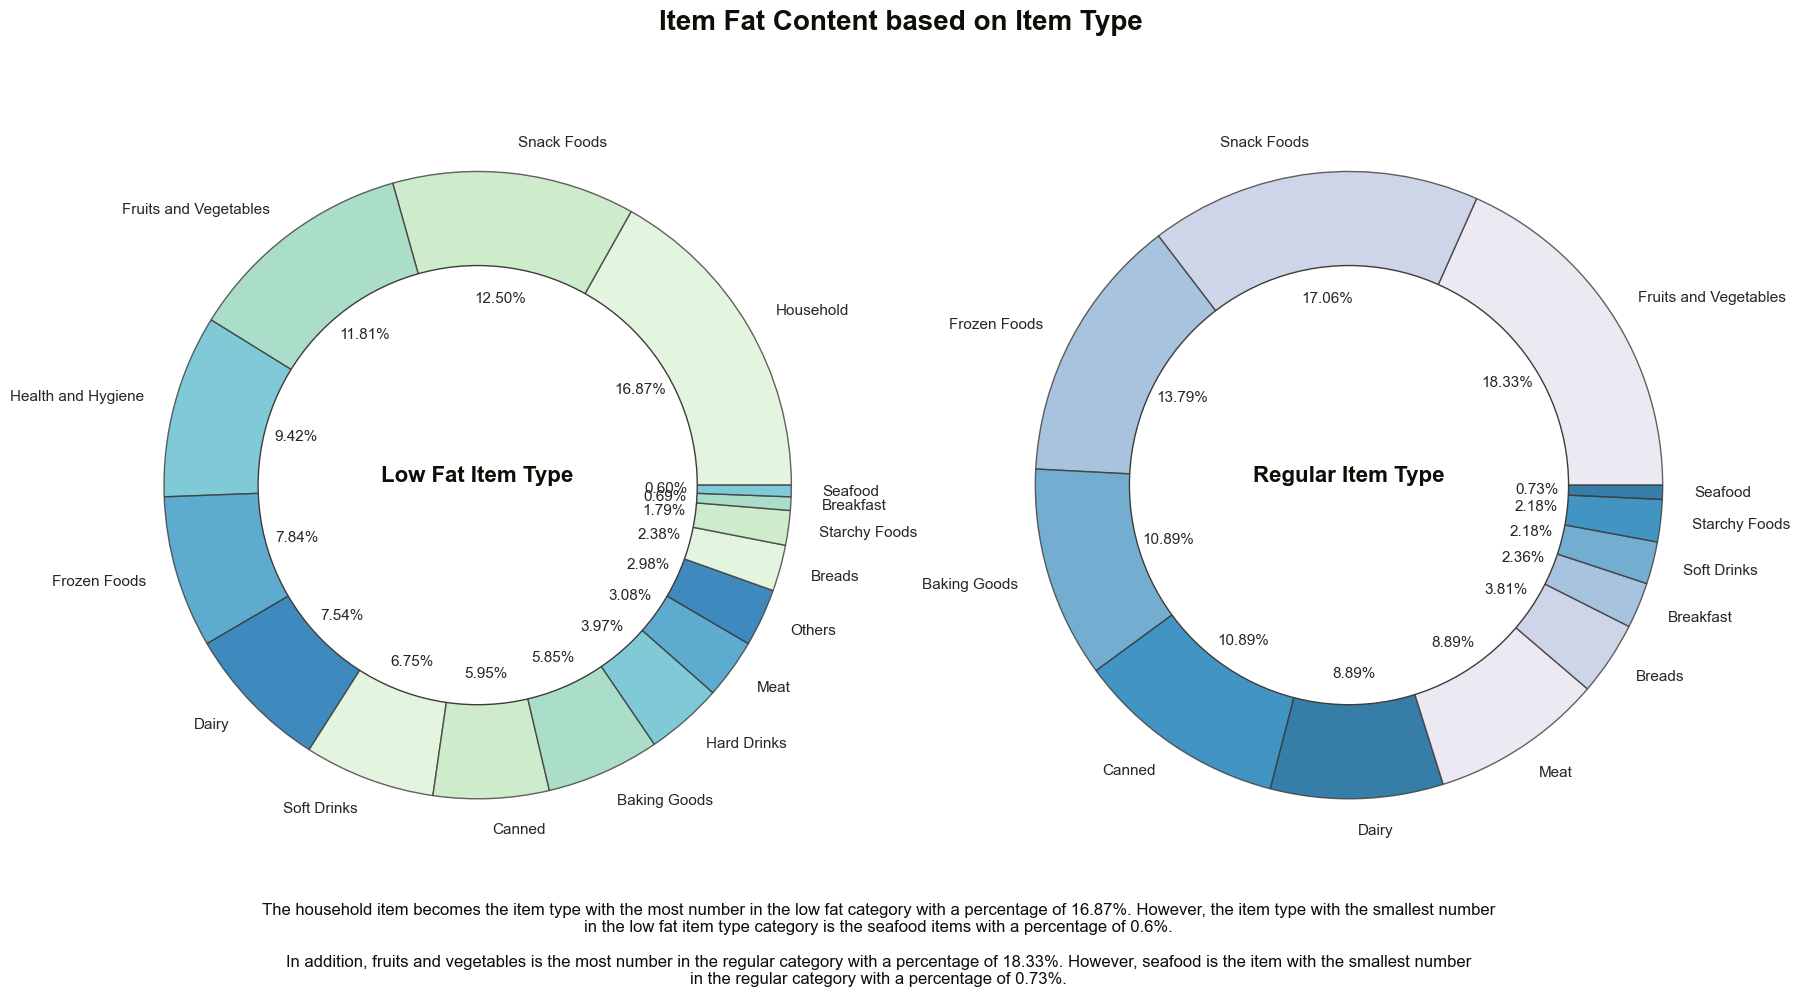

In [35]:
# --- Group Item Type and Item ID based on Item Fat Content ---
dsreg = ds.loc[ds['Item_Fat_Content'] == 'Regular']
dsreg = dsreg[['Item_Type', 'Item_Identifier']]
dsreg = dsreg.groupby(['Item_Type'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Item_Identifier'], ascending=False)

dslf = ds.loc[ds['Item_Fat_Content'] == 'Low Fat']
dslf = dslf[['Item_Type', 'Item_Identifier']]
dslf = dslf.groupby(['Item_Type'], dropna=False)['Item_Identifier'].nunique().reset_index().sort_values(by=['Item_Identifier'], ascending=False)

# --- Figure Size & Title Settings ---
plt.figure(figsize=(18, 10))
plt.suptitle('Item Fat Content based on Item Type', fontweight='heavy', fontsize=20, fontfamily='sans-serif', 
             color=black_grad[0])

# --- 1st Donut Chart ---
plt.subplot(1, 2, 1)
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
plt.pie(dslf['Item_Identifier'], labels=dslf['Item_Type'], colors=sns.color_palette('GnBu'), autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':11})
centre = plt.Circle((0, 0), 0.7, fc='white', edgecolor=black_grad[1])
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.text(0, 0, 'Low Fat Item Type', fontsize=16, ha='center', va='bottom', wrap=True, color=black_grad[0], 
         fontweight='bold', fontfamily='sans-serif')

# --- 2nd Donut Chart ---
plt.subplot(1, 2, 2)
plt.pie(dsreg['Item_Identifier'], labels=dsreg['Item_Type'], colors=sns.color_palette('PuBu'), autopct='%.2f%%', 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), textprops={'fontsize':11})
plt.tight_layout(rect=[0, 0.04, 1, 1.01])
centre = plt.Circle((0, 0), 0.7, fc='white', edgecolor=black_grad[1])
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.text(0, 0, 'Regular Item Type', fontsize=16, ha='center', va='bottom', wrap=True, color=black_grad[0], 
         fontweight='bold', fontfamily='sans-serif')

# --- Bottom Text (Explanation Text) ---
plt.text(-1.5, -1.6, 'The household item becomes the item type with the most number in the low fat category with a percentage of 16.87%. However, the item type with the smallest number\nin the low fat item type category is the seafood items with a percentage of 0.6%.\n\nIn addition, fruits and vegetables is the most number in the regular category with a percentage of 18.33%. However, seafood is the item with the smallest number\nin the regular category with a percentage of 0.73%.', 
         fontsize=12, ha='center', va='bottom', wrap=True, color=black_grad[0]);

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.3 | Outlet Location Type based on Outlet Type 📉</div>

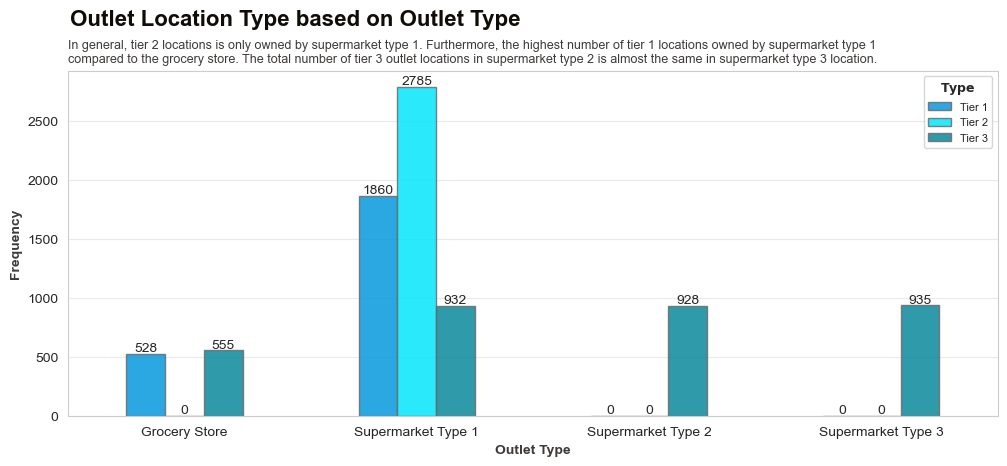

In [36]:
# --- Labels Settings ---
labels = ['Tier 1', 'Tier 2', 'Tier 3']
label_mart = np.array([0, 1, 2, 3])
label_mart2 = ['Grocery Store', 'Supermarket Type 1', 'Supermarket Type 2', 'Supermarket Type 3']

# --- Creating Bar Chart ---
ax = pd.crosstab(ds.Outlet_Type, ds.Outlet_Location_Type).plot(kind='bar', figsize=(10, 6), color=color_mix[0:3], 
                                                               alpha=0.85, edgecolor=black_grad[2])

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20, rect.get_height(), horizontalalignment='center', 
             fontsize=10)

plt.suptitle('Outlet Location Type based on Outlet Type', fontweight='heavy', x=0.057, y=0.99, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('In general, tier 2 locations is only owned by supermarket type 1. Furthermore, the highest number of tier 1 locations owned by supermarket type 1\ncompared to the grocery store. The total number of tier 3 outlet locations in supermarket type 2 is almost the same in supermarket type 3 location.', 
          fontsize='9', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Outlet Type', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_mart, label_mart2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Type}$', fontsize='8', title_fontsize='9', loc='upper right', frameon=True);

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.4 | Outlet Identifier based on Outlet Size 💹</div>

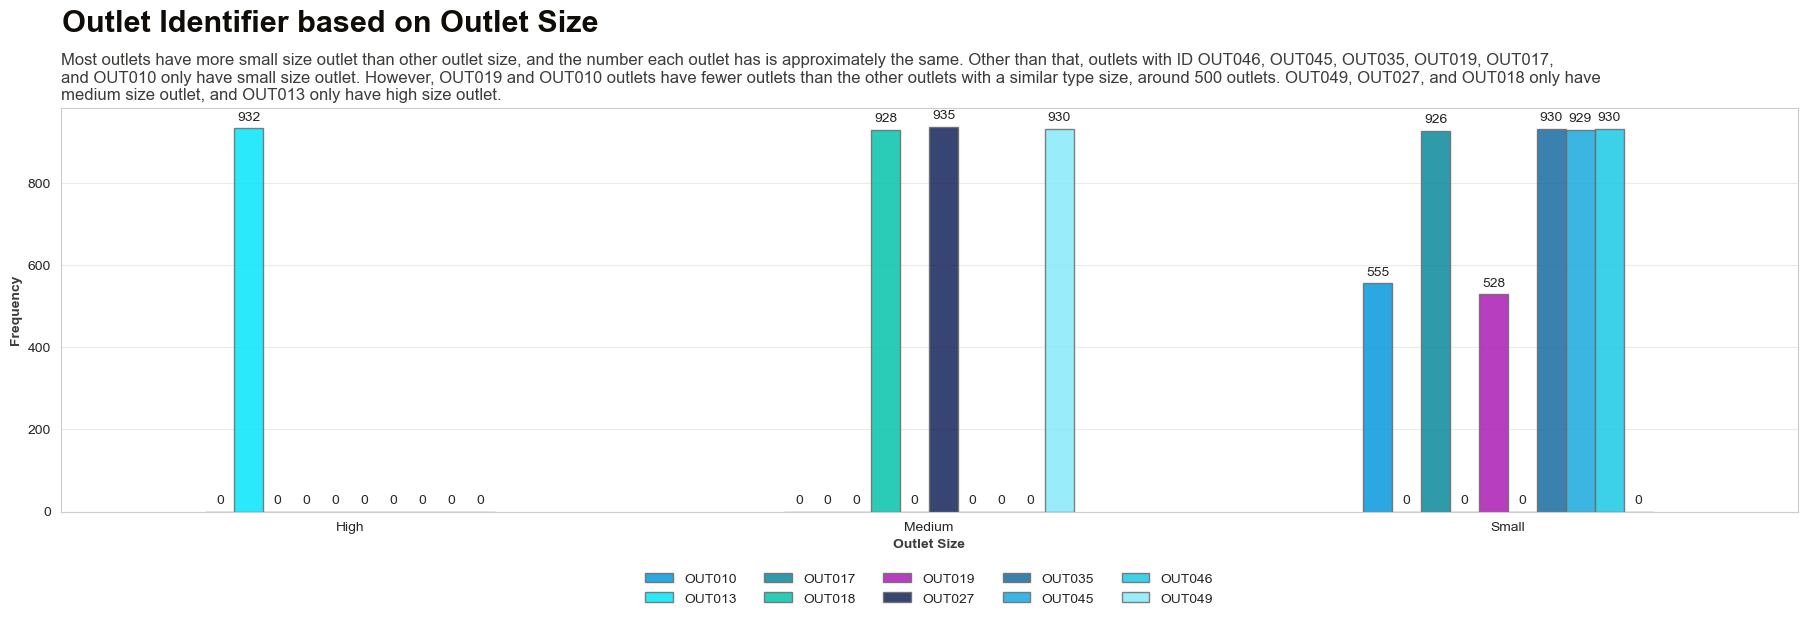

In [37]:
# --- Labels Settings ---
labels = ['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']
label_mart = np.array([0, 1, 2])
label_mart2 = ['High', 'Medium', 'Small']

# --- Creating Bar Chart ---
ax = pd.crosstab(ds.Outlet_Size, 
                 ds.Outlet_Identifier).plot(kind='bar', figsize=(18, 6), alpha=0.85, edgecolor=black_grad[2],
                                            color=['#0698DC', '#05E6FA', '#09899B', '#04C4AC', '#AB1CB4', '#142459', '#176BA0', '#19AADE', '#1AC9E6', '#87EAFA'])

# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+20, rect.get_height(), horizontalalignment='center', 
             fontsize=10)

plt.suptitle('Outlet Identifier based on Outlet Size', fontweight='heavy', x=0.0275, y=1, ha='left', fontsize='22', 
             fontfamily='sans-serif', color=black_grad[0]) 
plt.title('Most outlets have more small size outlet than other outlet size, and the number each outlet has is approximately the same. Other than that, outlets with ID OUT046, OUT045, OUT035, OUT019, OUT017,\nand OUT010 only have small size outlet. However, OUT019 and OUT010 outlets have fewer outlets than the other outlets with a similar type size, around 500 outlets. OUT049, OUT027, and OUT018 only have\nmedium size outlet, and OUT013 only have high size outlet.', 
          fontsize='12', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.01, 1, 1.025])
plt.xlabel('Outlet Size', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Frequency', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.xticks(label_mart, label_mart2, rotation=0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5, borderpad=1, frameon=False, fontsize=10)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0);

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">7.5 | Outlet Identifier based on Outlet Type 📦</div>

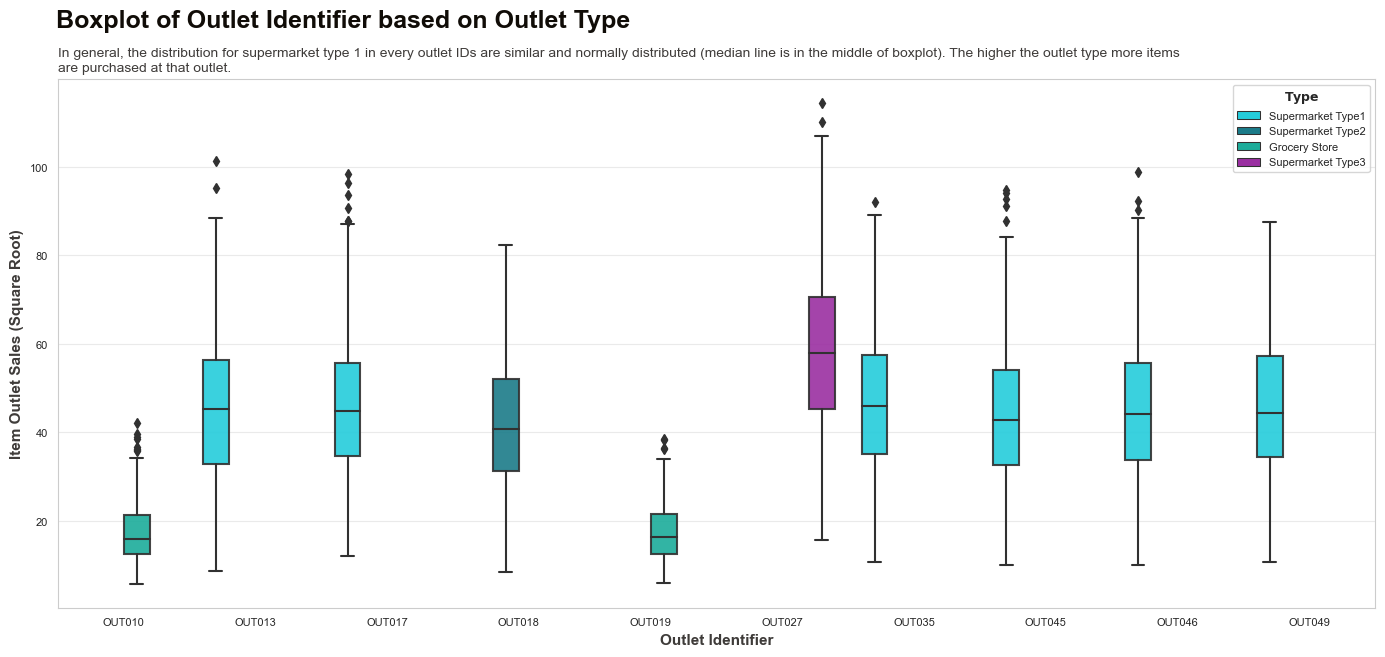

In [38]:
# --- Labels Settings ---
order=['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027', 'OUT035', 'OUT045', 'OUT046', 'OUT049']

# --- Creating Box Plot based on Outlet Type ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.suptitle('Boxplot of Outlet Identifier based on Outlet Type', fontweight='heavy', x=0.124, y=0.98, ha='left', 
             fontsize='18', fontfamily='sans-serif', color=black_grad[0])
plt.title('In general, the distribution for supermarket type 1 in every outlet IDs are similar and normally distributed (median line is in the middle of boxplot). The higher the outlet type more items\nare purchased at that outlet.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales_sqrt', hue='Outlet_Type', data=ds, order=order, ax=ax, 
            palette=color_mix[1:], boxprops=dict(alpha=0.9), linewidth=1.5)
plt.xlabel('Outlet Identifier', fontweight='bold', fontsize='11', fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Item Outlet Sales (Square Root)', fontweight='bold', fontsize='11', fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks(fontsize='8')
plt.yticks(fontsize='8')
plt.legend(title='$\\bf{Type}$', fontsize='8', title_fontsize='9', loc='upper right', frameon=True)
plt.grid(axis='y', alpha=0.4)
plt.show()

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    <blockquote style="font-size: 16px; color: #000000;">
        ▶ Conclusion: <b>H<sub>0</sub> accepted</b>
    </blockquote>
</div>

# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">9. | Feature Engineering 🛠</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform <b>feature engineering</b> including <mark><b>one-hot encoding, label encoding, and binning</b></mark>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.1 | Creating New Columns 💫</div>

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.1.1 | Item_Category</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 A new column called <mark><b>"Item_Category"</b></mark> will be created <b>based on the first 2 letters in "Item_Identifier" column</b>.<br>
    👉 <b>FD</b> will be classified as <b>food products</b>, <b>DR as drink products</b>, and <b>NC as non-consumable</b>.
</div>

In [39]:
# --- Creating 'Item_Category' Column ---
ds['Item_Category'] = ds['Item_Identifier'].astype(str).str[:2]
ds['Item_Category'] = ds['Item_Category'].replace(['FD', 'DR', 'NC'],['Food', 'Drink', 'Non-Consumable'])

### <div style="font-family: Trebuchet MS; background-color: #1AC9E6; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.1.2 | Age_Outlet</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Next, <mark><b>"Age_Outlet"</b></mark> will be created based on the <b>substraction of 2022 with the year in "Outlet_Establishment_Year" column</b>.
</div>

In [40]:
# --- Creating 'Age_Outlet' Column ---
ds['Age_Outlet'] = 2022-ds['Outlet_Establishment_Year']

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.2 | Binning 🧺</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Binning method will be performed on <b>"Age_Outlet"</b> to create <mark><b>"Outlet_Category"</b></mark> column.
</div>

In [41]:
# --- Binning in 'Outlet_Category' ---
bin = [1, 10, 20, 100]
outlet_cat = ['New Outlet', 'Moderate Outlet', 'Old Outlet']
ds['Outlet_Category'] = pd.cut(ds['Age_Outlet'], bins=bin, labels=outlet_cat)

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.3 | Label Encoding 🔖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform <mark><b>label encoding</b></mark> for "Item_Fat_Content" column.
</div>

In [42]:
# --- Label Encoding on 'Item_Fat_Content' ---
ds['Item_Fat_Content_Encoding'] = ds['Item_Fat_Content'].replace(['Low Fat', 'Regular'], ['0', '1'])

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.4 | One-Hot Encoding 🧨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <mark><b>One-hot encoding</b></mark> will be performed for <b>"Item_Category", "Outlet_Category", "Outlet_Size", and "Outlet_Location_Type"</b>.
</div>

In [43]:
# --- Perform One-Hot Encoding ---
a = pd.get_dummies(ds['Item_Category'], prefix = 'Item_Category')
b = pd.get_dummies(ds['Outlet_Category'], prefix = 'Outlet_Category')
c = pd.get_dummies(ds['Outlet_Size'], prefix = 'Outlet_Size')
d = pd.get_dummies(ds['Outlet_Location_Type'], prefix = 'Outlet_Location_Type')
e = pd.get_dummies(ds['Outlet_Type'], prefix = 'Outlet_Type')

# --- Concat w/ Main Dataframe ---
frames = [ds, a, b, c, d, e]
ds = pd.concat(frames, axis = 1)

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.5 | Dropping Unnecessary Variables 🔻</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The <b>variables that unnecessary will be deleted</b>.
</div>

In [44]:
# --- Drop Unnecessary Variables ---
ds = ds.drop(columns = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Category', 
                        'Outlet_Category', 'Outlet_Establishment_Year'])

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">9.6 | Final Dataframe 📄</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Below will show the final dataframe.
</div>

In [45]:
# --- Show Final Dataset ---
ds.head().style.background_gradient(cmap='GnBu').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Item_Identifier,Item_Weight,Item_Type,Item_MRP,Outlet_Identifier,Item_Visibility_sqrt,Item_Outlet_Sales_sqrt,Age_Outlet,Item_Fat_Content_Encoding,Item_Category_Drink,Item_Category_Food,Item_Category_Non-Consumable,Outlet_Category_New Outlet,Outlet_Category_Moderate Outlet,Outlet_Category_Old Outlet,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
FDA15,9.300000,Dairy,249.809200,OUT049,0.126678,61.115775,23,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
DRC01,5.920000,Soft Drinks,48.269200,OUT018,0.138846,21.057607,13,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
FDN15,17.500000,Meat,141.618000,OUT049,0.129461,45.795961,23,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0
FDX07,19.200000,Fruits and Vegetables,182.095000,OUT010,0.000000,27.062520,24,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0
NCD19,8.930000,Household,53.861400,OUT013,0.000000,31.538947,35,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0


# <div style="font-family: Trebuchet MS; background-color: #176BA0; color: #FFFFFF; padding: 12px; line-height: 1.5;">10. | Conclusion 👀</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 In this final section, <mark><b>the new dataset metadata will be shown</b></mark>. In addition, the new dataframe (cleaned) will be <mark><b>exported</b></mark> as <b><code>.csv</code> file</b>.
</div>
<!-- Hello world 👋. Thank you so much for downloading/forking my codes/works. If you like my works, please support me by giving upvotes and comments on my Kaggle profile (https://www.kaggle.com/caesarmario/). Thank you so much and have a great day 😆👍. More about me: https://linktr.ee/caesarmario_ -->
    

## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">10.1 | New Metadata ✨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The <mark><b>new metadata</b></mark> for data set defined as follows:<br>

<table style="width:100%">
<thead>
  <tr>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Column Name</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Data Type</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Description</th>
    <th style="text-align:center; font-weight: bold; font-size: 14px; background-color: #87EAFA">Instances</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="font-weight: bold">Item_Identifier</td>
    <td>Char</td>
    <td>ProductID</td>
    <td>{FDA15, DRC01, FDN15, …}</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Item_Weight</td>
    <td>Num</td>
    <td>The product's weight</td>
    <td>{9.3, 5.92, 17.5, …}</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Item_Type</td>
    <td>Char</td>
    <td>Category of product<br>(Soft Drinks, Dairy, Hard Drinks, Canned, Frozen Foods, <br> Fruits and Vegetables, Snack Foods, Baking Goods, Starchy Foods, Meat, <br> Seafood, Breakfast, Breads, Health and Hygiene, Household, Others)</td>
    <td>{Dairy, Soft Drinks, Meat, …}</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Item_MRP</td>
    <td>Num</td>
    <td>Maximum Retail Price of a product</td>
    <td>{249.8092, 48.2692, 141.618, …}</td>
  </tr>
  <tr>
    <td style="font-weight: bold">Outlet_Identifier</td>
    <td>Char</td>
    <td>Outlet ID</td>
    <td>{OUT049,OUT018, OUT049, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Item_Visibility_sqrt</td>
    <td>Num</td>
    <td>The percentage of a store's overall display area <br> that is dedicated to a single product (Square Root).</td>
    <td>{0.126678, 0.138846, 0.129461, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Item_Outlet_Sales_sqrt</td>
    <td>Num</td>
    <td>Sales of product (Square Root)</td>
    <td>{61.115775, 21.057607, 45.795961, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Age_Outlet</td>
    <td>Num</td>
    <td>Age of an outlet</td>
    <td>{23, 13, 35, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Item_Fat_Encoding</td>
    <td>Num</td>
    <td>Types of Product Content<br><br>0 = Low Fat<br>1 = Regular</td>
    <td>{0, 1, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Item_Category_Drink</td>
    <td>Num</td>
    <td>Encoded Item_Category<br><br>0 ≠ Drink<br>1 = Drink</td>
    <td>{0, 1, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Item_Category_Food</td>
    <td>Num</td>
    <td>Encoded Item_Category<br><br>0 ≠ Food<br>1 = Food</td>
    <td>{1, 0, 1, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Item_Category_Non-Consumable</td>
    <td>Num</td>
    <td>Encoded Item_Category<br><br>0 ≠ Non-Consumable<br>1 = Non-Consumable</td>
    <td>{0, 0, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Category_New Outlet</td>
    <td>Num</td>
    <td>Encoded Outlet_Category<br><br>0 ≠ New Outlet<br>1 = New Outlet</td>
    <td>{0, 0, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Category_Moderate Outlet</td>
    <td>Num</td>
    <td>Encoded Outlet_Category<br><br>0 ≠ Moderate Outlet<br>1= Moderate Outlet</td>
    <td>{0, 1, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Category_Old Outlet</td>
    <td>Num</b></td>
    <td>Encoded Outlet_Category<br><br>0 ≠ Old Outlet<br>1 = Old Outlet</td>
    <td>{1, 0, 1, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Size_High</td>
    <td>Num</td>
    <td>Encoded Outlet_Size<br><br>0 ≠ High<br>1 = High</td>
    <td>{0, 0, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Size_Medium</td>
    <td>Num</td>
    <td>Encoded Outlet_Size<br><br>0 ≠ Medium<br>1 = Medium</td>
    <td>{1, 1, 1, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Size_Small</td>
    <td>Num</td>
    <td>Encoded Outlet_Size<br><br>0 ≠ Small<br>1 = Small</td>
    <td>{0, 0, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Location_Type_Tier_1</td>
    <td>Num</td>
    <td>Encoded Outlet_Location_Type<br><br>0 ≠ Tier 1<br>1 = Tier 1</td>
    <td>{1, 0, 1, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Location_Type_Tier_2</td>
    <td>Num</td>
    <td>Encoded Outlet_Location_Type<br><br>0 ≠ Tier 2<br>1 = Tier 2</td>
    <td>{0, 0, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Location_Type_Tier_3</td>
    <td>Num</td>
    <td>Encoded Outlet_Location_Type<br><br>0 ≠ Tier 3<br>1 = Tier 3</td>
    <td>{0, 1, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Type_Grocery_Store</td>
    <td>Num</td>
    <td>Encoded Outlet_Type<br><br>0 ≠ Grocery Store<br>1 = Grocery Store</td>
    <td>{0, 0, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Type_Supermarket_Type1</td>
    <td>Num</td>
    <td>Encoded Outlet_Type<br><br>0 ≠ Supermarket Type1<br>1 = Supermarket Type1</td>
    <td>{1, 0, 1, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Type_Supermarket_Type2</td>
    <td>Num</td>
    <td>Encoded Outlet_Type<br><br>0 ≠ Supermarket Type2<br>1 = Supermarket Type2</td>
    <td>{0, 1, 0, …}</td>
  </tr>
  <tr style="background-color: #E0FBFF; font-weight: bold">
    <td>Outlet_Type_Supermarket_Type3</td>
    <td>Num</td>
    <td>Encoded Outlet_Type<br><br>0 ≠ Supermarket Type3<br>1 = Supermarket Type3</td>
    <td>{0, 0, 0, …}</td>
  </tr>
</tbody>
</table>
</div>




## <div style="font-family: Trebuchet MS; background-color: #19AADE; color: #FFFFFF; padding: 12px; line-height: 1.5;">10.2 | Export to New File 📤</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The final step will <mark><b>export the cleaned dataset in new file</b></mark> (<code>.csv</code> file).
</div>

In [46]:
# --- Export Cleaned Dataframe into `.csv` File ---
ds.to_csv('train_v9rqX0R_new.csv', index=False)